# **PHÂN TÍCH Ô NHIỄM KHÔNG KHÍ KHU VỰC HÀ NỘI**

# GIỚI THIỆU

# **1. Import thư viện**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import cm


# **2. Load & Làm Sạch Dữ Liệu**

#**2.1 Load & Đọc Dữ Liệu**

In [ ]:
data = pd.read_csv('/content/Hanoi_aq_cleaned_final.csv',  parse_dates=['datetime'])
print("Số dòng:", len(data))
print("Các cột:", data.columns.tolist())

Số dòng: 872495
Các cột: ['datetime', 'pm10_cams', 'pm2_5_cams', 'carbon_monoxide_cams', 'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams', 'location_id', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain', 'wind_speed_10m', 'wind_direction_10m', 'pressure_msl', 'lat', 'lon']


# **Comment**
                            
datetime :Thời gian quan trắc (định dạng UTC)

pm10_cams: Nồng độ bụi mịn PM10 (μg/m³)   

pm2_5_cams: Nồng độ bụi mịn PM2.5 (μg/m³)               

carbon_monoxide_cams: Nồng độ CO (carbon monoxide, ppm hoặc μg/m³)

nitrogen_dioxide_cams: Nồng độ NO₂ (μg/m³)      

sulphur_dioxide_cams: Nồng độ SO₂ (μg/m³)         

ozone_cams: Nồng độ O₃ (μg/m³)  

location_id: ID trạm đo hoặc khu vực quan trắc

temperature_2m: Nhiệt độ không khí tại 2 mét (°C)

relative_humidity_2m: Độ ẩm tương đối (%)  

precipitation: Lượng mưa (mm)   
                          
rain: Cường độ mưa (mm/h)      

wind_speed_10m: Tốc độ gió ở cao 10m (m/s)     
             
wind_direction_10m: Hướng gió ở cao 10m (độ)      

pressure_msl: Áp suất tại mực nước biển (hPa)      




|   location_id | name                                             |
|--------------:|:-------------------------------------------------|
|          2539 | US Diplomatic Post: Hanoi                        |
|          7441 | Hanoi                                            |
|       1285357 | SPARTAN - Vietnam Acad. Sci.                     |
|       2161290 | An Khánh                                         |
|       2161291 | Cầu Diễn                                         |
|       2161292 | Số 46, phố Lưu Quang Vũ                          |
|       2161293 | Chúc Sơn                                         |
|       2161294 | Cung thiếu nhi                                   |
|       2161295 | Đầm Trấu                                         |
|       2161296 | Đào Duy Từ                                       |
|       2161298 | Đông Kinh Nghĩa Thục                             |
|       2161299 | Hàng Đậu                                         |
|       2161300 | Hoàn Kiếm                                        |
|       2161301 | Khương Trung                                     |
|       2161303 | Kim Liên                                         |
|       2161304 | Lê Trực                                          |
|       2161306 | Minh Khai - Bắc Từ Liêm                          |
|       2161307 | Mỹ Đình                                          |
|       2161308 | Phạm Văn Đồng                                    |
|       2161309 | Pháp Vân                                         |
|       2161313 | Tân Mai                                          |
|       2161314 | Tây Hồ Tây                                       |
|       2161315 | Tây Mỗ                                           |
|       2161316 | Thành Công                                       |
|       2161318 | Tứ Liên                                          |
|       2161320 | Vân Hà                                           |
|       2161321 | Văn Quán                                         |
|       2161322 | Võng La                                          |
|       4946811 | 556 Nguyễn Văn Cừ                                |
|       4946812 | Công viên hồ điều hòa Nhân Chính, Khuất Duy Tiến |
|       4946813 | ĐH Bách Khoa - cổng Parabol đường Giải Phóng     |

In [ ]:
data.head(10)

,datetime,pm10_cams,pm2_5_cams,carbon_monoxide_cams,nitrogen_dioxide_cams,sulphur_dioxide_cams,ozone_cams,location_id,temperature_2m,relative_humidity_2m,precipitation,rain,wind_speed_10m,wind_direction_10m,pressure_msl,lat,lon
0,2022-08-04 07:00:00+07:00,58.0,40.3,595.0,29.70,16.75,24.0,2539.0,28.385000,86.610330,0.0,0.0,4.843305,138.01286,1004.7,21.02177,105.819002
1,2022-08-04 08:00:00+07:00,43.5,30.0,552.0,25.05,18.20,49.0,2539.0,29.385000,82.464210,0.0,0.0,2.189795,170.53775,1004.9,21.02177,105.819002
2,2022-08-04 09:00:00+07:00,47.3,32.7,492.0,18.40,20.20,84.0,2539.0,30.335000,79.710050,0.0,0.0,1.297998,326.30990,1004.7,21.02177,105.819002
3,2022-08-04 10:00:00+07:00,50.3,34.9,429.0,11.25,21.95,128.0,2539.0,31.685000,73.368580,0.0,0.0,4.582052,315.00010,1004.4,21.02177,105.819002
4,2022-08-04 11:00:00+07:00,55.2,38.3,414.0,8.60,21.45,154.0,2539.0,32.385002,71.354866,0.0,0.0,4.349896,335.55606,1004.1,21.02177,105.819002
5,2022-08-04 12:00:00+07:00,59.1,41.1,414.0,7.25,20.10,178.0,2539.0,32.935000,69.996864,0.0,0.0,4.024922,349.69522,1003.6,21.02177,105.819002
6,2022-08-04 13:00:00+07:00,62.6,43.5,427.0,8.40,18.95,194.0,2539.0,33.335003,69.048540,0.0,0.0,1.297998,326.30990,1002.6,21.02177,105.819002
7,2022-08-04 14:00:00+07:00,67.1,46.6,438.0,11.50,19.60,188.0,2539.0,33.585003,67.489920,0.3,0.3,2.189795,80.53775,1001.6,21.02177,105.819002
8,2022-08-04 15:00:00+07:00,64.7,45.1,455.0,16.45,20.90,171.0,2539.0,32.385002,70.935330,1.2,1.2,5.760000,90.00000,1001.0,21.02177,105.819002
9,2022-08-04 16:00:00+07:00,63.3,44.0,509.0,26.85,22.45,144.0,2539.0,32.185000,71.741590,0.3,0.3,10.137692,83.88459,1000.8,21.02177,105.819002


# **2.2. Làm sạch dữ liệu**

**2.2.1 Kiểm tra giá trị thiếu**

In [ ]:
isnas = data.isna().sum()


**2.2.2 Dữ liệu trùng lặp**

In [ ]:
# Kiểm tra số dòng trùng lặp
duplicates = data.duplicated().sum()

# In ra kết quả kiểm tra
print(f"\n Số dòng trùng lặp: {duplicates}")


 Số dòng trùng lặp: 0


**2.2.3 Kiểm tra giá trị âm**

In [ ]:
data = data.set_index('datetime')

# Tạo cột thời gian phụ
data['year'] = data.index.year
data['month'] = data.index.month
data['hour'] = data.index.hour

In [ ]:
# Kiểm tra và xử lý giá trị âm cho các cột ô nhiễm
pollutants = ['pm10_cams', 'pm2_5_cams', 'carbon_monoxide_cams',
              'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams']

for col in pollutants:
    neg_mask = data[col] < 0
    neg_count = neg_mask.sum()

    if neg_count > 0:
        print(f"\n{col} có {neg_count} giá trị âm:")
        # Thay thế bằng NaN và nội suy
        print(f"Thay thế bằng NaN và nội suy...")
        data.loc[neg_mask, col] = np.nan
        data[col] = data[col].interpolate(method='linear')

# In tổng kết cuối cùng
print("\nTỔNG KẾT SAU KHI XỬ LÝ:")
for col in pollutants:
    neg_after = (data[col] < 0).sum()
    print(f"{col}: {neg_after} giá trị âm")


ozone_cams có 24 giá trị âm:
Thay thế bằng NaN và nội suy...

TỔNG KẾT SAU KHI XỬ LÝ:
pm10_cams: 0 giá trị âm
pm2_5_cams: 0 giá trị âm
carbon_monoxide_cams: 0 giá trị âm
nitrogen_dioxide_cams: 0 giá trị âm
sulphur_dioxide_cams: 0 giá trị âm
ozone_cams: 0 giá trị âm


**2.2.4 Outliers**

[QUY CHUẨN KỸ THUẬT QUỐC GIA
VỀ CHẤT LƯỢNG KHÔNG KHÍ ](https://sonnmt.langson.gov.vn/upload/105376/20250319/01-btnmt-qc05_c7c2a.pdf)

**Bảng Giới Hạn Tối Đa Thông Số Cơ Bản Theo QCVN 05:2023/BTNMT**

**Với điều kiện đo lường thực tế Nhiệt độ thực tế ($T$): $25^\circ\text{C}$, Áp suất thực tế ($P$): $760 \text{ mm} \text{Hg}$**

| TT | Thông số | Đơn vị | Trung bình 1 giờ | Trung bình 8 giờ | Trung bình 24 giờ | Trung bình năm | Ghi chú |
|:--:|:---|:---:|:---:|:---:|:---:|:---:|:---|
| 1 | $\text{SO}_2$ | $\mu g/m^3$ | $350$ | - | $125$ | $50$ | - |
| 2 | $\text{CO}$ | $\mu g/m^3$ | $30.000$ | $10.000$ | - | - | - |
| 3 | $\text{NO}_2$ | $\mu g/m^3$ | $200$ | - | $100$ | $40$ | - |
| 4 | $\text{O}_3$ | $\mu g/m^3$ | $200$ | $120$ | - | - | - |
| 5 | Bụi $\text{PM}_{10}$ | $\mu g/m^3$ | - | - | $100$ | $50$ | - |
| 6 | Bụi $\text{PM}_{2.5}$ | $\mu g/m^3$ | - | - | $50$ | $25$ |

$\text{Giá trị $\text{PM}_{2.5}$ =  45}$ $\mu g/m^3$ $\text{áp dụng từ 01/01/2026}$

*Ghi chú: Dấu ( - ) là Không quy định.*

In [ ]:
# 1. Định nghĩa các ngưỡng tối đa
NGUONG_TOI_DA = {
    'carbon_monoxide_cams': 30000,
    'nitrogen_dioxide_cams': 200,
    'sulphur_dioxide_cams': 350,
    'ozone_cams': 200
}

# 2. Lặp qua từng cột và kiểm tra điều kiện
for cot, nguong in NGUONG_TOI_DA.items():
    # Kiểm tra xem cột có tồn tại trong DataFrame hay không
    if cot in data.columns:
        # 3. Tìm các giá trị ngoại lai: những giá trị lớn hơn ngưỡng tối đa
        outliers = data[data[cot] > nguong][[cot, 'location_id']]

        # 4. In kết quả
        if not outliers.empty:
            print(f"\nCột: '{cot}' (Ngưỡng > {nguong:.3f} là ngưỡng QCVN 05:2023/BTNMT:) có {len(outliers)} giá trị ngoại lai:")

            # Nhóm các giá trị ngoại lai theo location_id
            grouped_outliers = outliers.groupby('location_id')

            # Duyệt qua từng trạm
            for location_id, group in grouped_outliers:
                count_outliers = len(group)

                # ĐIỀU KIỆN MỚI: Nếu tổng số outlier ít (≤20) thì hiển thị tất cả
                if len(outliers) <= 20:
                    print(f"\n  Trạm {location_id}: có {count_outliers} giá trị ngoại lai")
                    for i, (index, row) in enumerate(group.iterrows()):
                        print(f"    {index} - {cot}: {row[cot]}")

                # Nếu nhiều outlier thì chỉ hiển thị 5 dòng mẫu
                else:
                    print(f"\n  Trạm {location_id}: có {count_outliers} giá trị ngoại lai")
                    print(f"  5 dòng mẫu:")

                    # In 5 dòng mẫu đầu tiên cho trạm này
                    for i, (index, row) in enumerate(group.head(5).iterrows()):
                        print(f"    {index} - {cot}: {row[cot]}")

                    # Nếu có nhiều hơn 5 dòng, thông báo số lượng còn lại
                    if count_outliers > 5:
                        print(f"    ... và {count_outliers - 5} giá trị ngoại lai khác")

        else:
            print(f"\n Cột: '{cot}' (Ngưỡng> {nguong:.3f} là ngưỡng QCVN 05:2023/BTNMT:): KHÔNG tìm thấy giá trị ngoại lai.")
    else:
        print(f"\n Cột '{cot}' KHÔNG TỒN TẠI trong DataFrame 'data'. Bỏ qua kiểm tra.")


 Cột: 'carbon_monoxide_cams' (Ngưỡng> 30000.000 là ngưỡng QCVN 05:2023/BTNMT:): KHÔNG tìm thấy giá trị ngoại lai.

Cột: 'nitrogen_dioxide_cams' (Ngưỡng > 200.000 là ngưỡng QCVN 05:2023/BTNMT:) có 11 giá trị ngoại lai:

  Trạm 1285357.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161290.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161291.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161292.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161306.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161307.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161308.0: có 1 giá trị ngoại lai
    2023-03-23 19:00:00+07:00 - nitrogen_dioxide_cams: 202.5

  Trạm 2161314.0: có 1 giá trị ngoại lai
    2023-03-23 19:

ngày 23/03/2023 ở HN có lễ hội du lịch ảnh hưởng đến giao thông trên toàn thành phố nên có ngoại lai của NO2

Các giá trị O₃ vượt ngưỡng tập trung chủ yếu trong khoảng 14h–16h, đạt đỉnh vào lúc 15h, đặc biệt rõ trong mùa Hè và Thu, và xuất hiện đồng thời tại nhiều trạm quan trắc.
Hiện tượng này cho thấy một đợt quang hoá mạnh đang xảy ra tại khu vực Hà Nội — khi bức xạ mặt trời cao, nhiệt độ lớn và điều kiện gió yếu làm tăng cường phản ứng quang hóa giữa NOₓ và VOC, dẫn đến sự tích tụ ozone trong tầng không khí gần mặt đất.
Đây là một quy luật vật lý – khí tượng tự nhiên thường gặp trong điều kiện khí hậu nhiệt đới đô thị.

In [ ]:
# Tìm cột thời gian thực tế
time_columns = [col for col in data.columns if 'time' in col.lower() or 'date' in col.lower()]
print(f"\nCác cột thời gian tìm thấy: {time_columns}")
# SỬ DỤNG CỘT THỜI GIAN ĐÚNG
if time_columns:
    time_col = time_columns[0]
    print(f"Sử dụng cột '{time_col}' làm index...")
    data = data.set_index(time_col)
else:
    print("sử dụng index hiện tại")

# Ngưỡng Trung bình 24 giờ
PM10_LIMIT_24H = 100  # µg/m³
PM2_5_LIMIT_24H = 50   # µg/m³

# Tạo Data Copy bằng Resampling và Tính Trung bình 24 giờ (1 ngày/dòng)
# Lấy các cột PM10, PM2.5 và location_id, Resample ('D' cho Daily/Hàng ngày), và tính trung bình.
# data_24h_mean là Data Copy mới, chỉ sử dụng cho việc kiểm tra này.
data_24h_mean = data[['pm10_cams', 'pm2_5_cams', 'location_id']].resample('D').agg({
    'pm10_cams': 'mean',
    'pm2_5_cams': 'mean',
    'location_id': 'first'  # Lấy location_id đầu tiên trong ngày (giả định cùng trạm trong ngày)
})

# Kiểm tra ngưỡng ngoại lai trên Data Copy
# Xác định điều kiện vi phạm
violation_pm10 = data_24h_mean['pm10_cams'] > PM10_LIMIT_24H
violation_pm2_5 = data_24h_mean['pm2_5_cams'] > PM2_5_LIMIT_24H

# Ghi nhận kết quả vào Data Copy
data_24h_mean['Vi_pham_PM10'] = violation_pm10
data_24h_mean['Vi_pham_PM2_5'] = violation_pm2_5

# Lọc ra các dòng (ngày) có ngoại lai (vi phạm ngưỡng 24h)
outliers_24h_reg = data_24h_mean[
    data_24h_mean['Vi_pham_PM10'] | data_24h_mean['Vi_pham_PM2_5']]

# KẾT QUẢ
print(f"Tổng số ngày được kiểm tra: {data_24h_mean.shape[0]}")
print("Data Copy (Trung bình 24 giờ/Ngày)")
print("Hiển thị 5 ngày đầu tiên:")
display(data_24h_mean.head(5))

print(f"\nPhát hiện {outliers_24h_reg.shape[0]} ngày vượt ngưỡng QCVN 05:2023/BTNMT:")

if outliers_24h_reg.shape[0] > 0:
    # Nhóm các ngày vi phạm theo location_id để hiển thị tối ưu
    grouped_violations = outliers_24h_reg.groupby('location_id')

    print(f"\nPHÂN TÍCH THEO TRẠM:")

    for location_id, group in grouped_violations:
        count_violations = len(group)
        print(f"\n--- Trạm {location_id}: có {count_violations} ngày vi phạm ---")

        # Hiển thị 5 ngày đầu tiên vi phạm của trạm này
        print("5 ngày vi phạm đầu tiên:")
        for i, (index, row) in enumerate(group.head(5).iterrows()):
            violations = []
            if row['Vi_pham_PM10']:
                violations.append(f"PM10: {row['pm10_cams']:.1f} µg/m³")
            if row['Vi_pham_PM2_5']:
                violations.append(f"PM2.5: {row['pm2_5_cams']:.1f} µg/m³")

            print(f"  {index.date()}: {', '.join(violations)}")

        # Thông báo số lượng còn lại nếu có nhiều hơn 5
        if count_violations > 5:
            print(f"  ... và {count_violations - 5} ngày vi phạm khác")

    # Hiển thị tổng quan tất cả vi phạm (dạng bảng)
    print(f"\nTỔNG QUAN TẤT CÁC NGÀY VI PHẠM ({outliers_24h_reg.shape[0]} ngày):")
    display(outliers_24h_reg[['pm10_cams', 'pm2_5_cams', 'Vi_pham_PM10', 'Vi_pham_PM2_5']].head(15))

else:
    print("Không có ngày nào vượt ngưỡng!")

# THỐNG KÊ TỔNG HỢP
print(f"\nTHỐNG KÊ TỔNG HỢP:")
print(f"- Số ngày vi phạm PM10: {violation_pm10.sum()}")
print(f"- Số ngày vi phạm PM2.5: {violation_pm2_5.sum()}")
print(f"- Số ngày vi phạm cả hai chỉ tiêu: {(violation_pm10 & violation_pm2_5).sum()}")


Các cột thời gian tìm thấy: []
sử dụng index hiện tại
Tổng số ngày được kiểm tra: 1173
Data Copy (Trung bình 24 giờ/Ngày)
Hiển thị 5 ngày đầu tiên:


,pm10_cams,pm2_5_cams,location_id,Vi_pham_PM10,Vi_pham_PM2_5
datetime,,,,,
2022-08-04 00:00:00+07:00,68.571157,47.759203,2539.0,False,False
2022-08-05 00:00:00+07:00,50.702957,35.414785,2539.0,False,False
2022-08-06 00:00:00+07:00,40.921371,28.597177,2539.0,False,False
2022-08-07 00:00:00+07:00,35.994355,24.981989,2539.0,False,False
2022-08-08 00:00:00+07:00,37.028898,25.570296,2539.0,False,False



Phát hiện 405 ngày vượt ngưỡng QCVN 05:2023/BTNMT:

PHÂN TÍCH THEO TRẠM:

--- Trạm 2539.0: có 405 ngày vi phạm ---
5 ngày vi phạm đầu tiên:
  2022-08-13: PM2.5: 50.1 µg/m³
  2022-08-24: PM2.5: 54.7 µg/m³
  2022-08-25: PM2.5: 56.5 µg/m³
  2022-09-03: PM2.5: 59.6 µg/m³
  2022-09-07: PM10: 120.6 µg/m³, PM2.5: 83.8 µg/m³
  ... và 400 ngày vi phạm khác

TỔNG QUAN TẤT CÁC NGÀY VI PHẠM (405 ngày):


,pm10_cams,pm2_5_cams,Vi_pham_PM10,Vi_pham_PM2_5
datetime,,,,
2022-08-13 00:00:00+07:00,71.807124,50.114382,False,True
2022-08-24 00:00:00+07:00,78.728226,54.706586,False,True
2022-08-25 00:00:00+07:00,80.893280,56.539919,False,True
2022-09-03 00:00:00+07:00,85.231048,59.614113,False,True
2022-09-07 00:00:00+07:00,120.630645,83.831452,True,True
2022-09-12 00:00:00+07:00,87.308468,59.865591,False,True
2022-09-13 00:00:00+07:00,96.483468,66.083737,False,True
2022-09-14 00:00:00+07:00,106.592608,72.926075,True,True
2022-09-18 00:00:00+07:00,75.617070,52.591398,False,True



THỐNG KÊ TỔNG HỢP:
- Số ngày vi phạm PM10: 92
- Số ngày vi phạm PM2.5: 405
- Số ngày vi phạm cả hai chỉ tiêu: 92


Giải thích vì sao chỉ có 1 trạm vi phạm

Trạm $\text{2539.0}$ (US Diplomatic Post: Hanoi) với $405$ ngày vi phạm.

Trạm này nằm ở khu vực trung tâm (quận Ba Đình cũ), là một khu vực có mật độ giao thông và hoạt động dân sinh cao. Vị trí này thường xuyên tiếp xúc với cả ô nhiễm cục bộ (giao thông) và ô nhiễm khu vực.

In [ ]:
# Các cột chất ô nhiễm cần thống kê
pollutants = [
    'pm2_5_cams', 'pm10_cams', 'carbon_monoxide_cams',
    'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams'
]

# 1Tính thống kê mô tả chi tiết cho từng trạm
desc = data.groupby('location_id')[pollutants].describe().round(2)

# Gộp tên cột (MultiIndex → 1 cấp) để dễ đọc
desc.columns = [f'{pollutant}_{stat}' for pollutant, stat in desc.columns]

# (Tuỳ chọn) Sắp xếp lại cột cho logic hơn (đưa mean, std, min, max gần nhau)
ordered_cols = []
for p in pollutants:
    ordered_cols += [f'{p}_count', f'{p}_mean', f'{p}_std', f'{p}_min',
                     f'{p}_25%', f'{p}_50%', f'{p}_75%', f'{p}_max']
desc = desc[ordered_cols]

# Làm bảng gọn hơn — hiển thị 2 chữ số thập phân và format rõ ràng
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1800)

# Hiển thị kết quả
print("BẢNG THỐNG KÊ MÔ TẢ CÁC CHẤT Ô NHIỄM THEO TRẠM")
# display(desc.head(10)) # hiển thị 10 trạm đầu để tránh tràn màn hình
#display(desc.head(10)) nếu mn muốn hiện 10 hàng thì hiện nha
display(desc)


BẢNG THỐNG KÊ MÔ TẢ CÁC CHẤT Ô NHIỄM THEO TRẠM


,pm2_5_cams_count,pm2_5_cams_mean,pm2_5_cams_std,pm2_5_cams_min,pm2_5_cams_25%,pm2_5_cams_50%,pm2_5_cams_75%,pm2_5_cams_max,pm10_cams_count,pm10_cams_mean,pm10_cams_std,pm10_cams_min,pm10_cams_25%,pm10_cams_50%,pm10_cams_75%,pm10_cams_max,carbon_monoxide_cams_count,carbon_monoxide_cams_mean,carbon_monoxide_cams_std,carbon_monoxide_cams_min,carbon_monoxide_cams_25%,carbon_monoxide_cams_50%,carbon_monoxide_cams_75%,carbon_monoxide_cams_max,nitrogen_dioxide_cams_count,nitrogen_dioxide_cams_mean,nitrogen_dioxide_cams_std,nitrogen_dioxide_cams_min,nitrogen_dioxide_cams_25%,nitrogen_dioxide_cams_50%,nitrogen_dioxide_cams_75%,nitrogen_dioxide_cams_max,sulphur_dioxide_cams_count,sulphur_dioxide_cams_mean,sulphur_dioxide_cams_std,sulphur_dioxide_cams_min,sulphur_dioxide_cams_25%,sulphur_dioxide_cams_50%,sulphur_dioxide_cams_75%,sulphur_dioxide_cams_max,ozone_cams_count,ozone_cams_mean,ozone_cams_std,ozone_cams_min,ozone_cams_25%,ozone_cams_50%,ozone_cams_75%,ozone_cams_max
location_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2539.0,28145.0,44.25,26.79,0.3,25.6,37.6,55.3,232.8,28145.0,57.94,33.67,0.4,34.3,49.6,72.6,291.5,28145.0,691.92,433.68,59.0,424.0,566.0,805.0,5115.0,28145.0,26.78,20.42,0.0,12.3,21.4,35.0,161.00,28145.0,25.33,12.36,0.2,16.65,23.3,31.4,93.5,28145.0,74.40,54.96,0.0,35.0,59.0,101.0,383.0
7441.0,28145.0,44.25,26.79,0.3,25.6,37.6,55.3,232.8,28145.0,57.94,33.67,0.4,34.3,49.6,72.6,291.5,28145.0,691.92,433.68,59.0,424.0,566.0,805.0,5115.0,28145.0,26.78,20.42,0.0,12.3,21.4,35.0,161.00,28145.0,25.33,12.36,0.2,16.65,23.3,31.4,93.5,28145.0,74.40,54.96,0.0,35.0,59.0,101.0,383.0
1285357.0,28145.0,48.21,26.76,0.3,28.6,42.7,61.5,221.7,28145.0,62.82,33.24,0.4,38.4,56.1,80.1,240.3,28145.0,726.55,421.51,59.0,453.0,605.0,861.0,5115.0,28145.0,30.89,21.36,0.0,15.2,26.3,40.9,202.50,28145.0,31.88,16.02,0.2,20.10,29.9,40.8,128.2,28145.0,73.91,57.57,0.0,31.0,56.0,104.0,379.0
2161290.0,28145.0,48.21,26.76,0.3,28.6,42.7,61.5,221.7,28145.0,62.82,33.24,0.4,38.4,56.1,80.1,240.3,28145.0,693.58,386.79,59.0,436.0,579.0,828.0,3488.0,28145.0,30.89,21.36,0.0,15.2,26.3,40.9,202.50,28145.0,31.88,16.02,0.2,20.10,29.9,40.8,128.2,28145.0,73.91,57.57,0.0,31.0,56.0,104.0,379.0
2161291.0,28145.0,48.21,26.76,0.3,28.6,42.7,61.5,221.7,28145.0,62.82,33.24,0.4,38.4,56.1,80.1,240.3,28145.0,726.55,421.51,59.0,453.0,605.0,861.0,5115.0,28145.0,30.89,21.36,0.0,15.2,26.3,40.9,202.50,28145.0,31.88,16.02,0.2,20.10,29.9,40.8,128.2,28145.0,73.91,57.57,0.0,31.0,56.0,104.0,379.0
2161292.0,28145.0,48.21,26.76,0.3,28.6,42.7,61.5,221.7,28145.0,62.82,33.24,0.4,38.4,56.1,80.1,240.3,28145.0,726.55,421.51,59.0,453.0,605.0,861.0,5115.0,28145.0,30.89,21.36,0.0,15.2,26.3,40.9,202.50,28145.0,31.88,16.02,0.2,20.10,29.9,40.8,128.2,28145.0,73.91,57.57,0.0,31.0,56.0,104.0,379.0
2161293.0,28145.0,42.05,23.91,0.5,25.1,37.0,53.0,210.9,28145.0,54.41,28.25,0.7,33.5,49.4,68.9,218.4,28145.0,597.44,298.99,59.0,387.0,524.0,736.0,2697.0,28145.0,25.37,16.69,0.0,12.9,22.1,34.0,122.65,28145.0,25.84,12.84,0.2,16.15,24.9,33.4,92.4,28145.0,71.77,51.97,0.0,34.0,58.0,99.0,402.0
2161294.0,28145.0,44.25,26.79,0.3,25.6,37.6,55.3,232.8,28145.0,57.94,33.67,0.4,34.3,49.6,72.6,291.5,28145.0,670.72,414.19,59.0,418.0,552.0,778.0,5190.0,28145.0,26.78,20.42,0.0,12.3,21.4,35.0,161.00,28145.0,25.33,12.36,0.2,16.65,23.3,31.4,93.5,28145.0,74.40,54.96,0.0,35.0,59.0,101.0,383.0
2161295.0,28145.0,44.25,26.79,0.3,25.6,37.6,55.3,232.8,28145.0,57.94,33.67,0.4,34.3,49.6,72.6,291.5,28145.0,670.72,414.19,59.0,418.0,552.0,778.0,5190.0,28145.0,26.78,20.42,0.0,12.3,21.4,35.0,161.00,28145.0,25.33,12.36,0.2,16.65,23.3,31.4,93.5,28145.0,74.40,54.96,0.0,35.0,59.0,101.0,383.0


Nhận xét tổng hợp theo thống kê mô tả

PM2.5 & PM10 (Bụi mịn)

PM2.5: trung bình ~42–48 µg/m³, dao động mạnh (std ~26–28), min ~0.3 và max tới ~258 → xuất hiện nhiều đợt ô nhiễm đột biến.

PM10: cao hơn PM2.5 ~15–20 µg/m³ (mean ~58–63, std ~33), phân vị 25–75% rộng (34–80 µg/m³) → biến động lớn theo thời gian và khu vực.
Các trạm 2161291, 2161307, 1285357 ghi nhận nồng độ trung bình cao nhất → vùng trọng điểm ô nhiễm bụi.

CO (Carbon Monoxide)

Giá trị trung bình 650–720 µg/m³, độ lệch chuẩn rất cao (~380–430), min ~59 và max vượt 5000 µg/m³.

Phân vị 25–75% (420–850 µg/m³) → mức dao động mạnh, biểu hiện đặc trưng của nguồn thải giao thông và đốt nhiên liệu.

CO cao trùng vùng có PM cao → nhóm trạm đô thị, mật độ xe lớn.

NO₂ (Nitrogen Dioxide)

Mean ~25–31 µg/m³, std ~20, max đạt ~200 µg/m³.

Phân vị 25–75% (15–41 µg/m³) → phân bố đồng đều, không cực đoan.
Các trạm có NO₂ trung bình > 30 (như 1285357, 2161291, 2161307) → nhóm đô thị/giao thông.

SO₂ (Sulphur Dioxide)

Mean ~25–32 µg/m³, std ~12–16, max có thể tới ~128 µg/m³.

Phân vị 25–75% (16–41 µg/m³) → dao động vừa phải.
Một số trạm có mức cao bất thường (1285357, 2161306–1308) → ảnh hưởng từ nguồn công nghiệp hoặc khu vực đốt than.

O₃ (Ozone)

Mean ~70–74 µg/m³, std ~50–57, min ~0, max ~380 µg/m³.

Phân bố giữa các trạm tương đối đồng đều, nhưng biến thiên theo thời gian lớn.
O₃ chủ yếu sinh ra từ phản ứng quang hóa, liên quan tới nhiệt độ và ánh sáng hơn là nguồn phát thải trực tiếp.

In [ ]:
#thongkemota all
data.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
pm10_cams,872495.0,5.967492e+01,3.335319e+01,0.400000,3.570000e+01,5.200000e+01,7.540000e+01,2.915000e+02
pm2_5_cams,872495.0,4.571824e+01,2.682250e+01,0.300000,2.670000e+01,3.930000e+01,5.770000e+01,2.580000e+02
carbon_monoxide_cams,872495.0,6.922053e+02,4.169459e+02,59.000000,4.290000e+02,5.730000e+02,8.150000e+02,5.190000e+03
nitrogen_dioxide_cams,872495.0,2.853400e+01,2.069911e+01,0.000000,1.350000e+01,2.350000e+01,3.760000e+01,2.025000e+02
sulphur_dioxide_cams,872495.0,2.809406e+01,1.420288e+01,0.200000,1.790000e+01,2.570000e+01,3.560000e+01,1.282000e+02
ozone_cams,872495.0,7.366539e+01,5.573779e+01,0.000000,3.300000e+01,5.700000e+01,1.010000e+02,4.020000e+02
location_id,872495.0,2.263497e+06,1.032069e+06,2539.000000,2.161294e+06,2.161304e+06,2.161316e+06,4.946813e+06
temperature_2m,872495.0,2.453302e+01,5.426369e+00,6.252500,2.108900e+01,2.547200e+01,2.822400e+01,4.134400e+01
relative_humidity_2m,872495.0,7.908799e+01,1.477131e+01,19.322088,6.956103e+01,8.190954e+01,9.154585e+01,1.000000e+02
precipitation,872495.0,2.775571e-01,1.141050e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-01,3.980000e+01


In [ ]:
center_ids = [2539, 7441, 1285357, 2161291, 2161292, 2161293, 2161296, 2161299, 1285357, 2161310, 2161308]
# Ví dụ tên trạm: US Diplomatic Post Hanoi, Hanoi, SPARTAN Vietnam Acad. Sci, Cầu Diễn, Phạm Hùng, Lý Thường Kiệt...


In [ ]:
near_center_ids = [2161300, 2161301, 2161302, 2161303, 2161304, 2161305, 2161309, 2161307, 2161298, 2161306]
# Ví dụ tên trạm: Võ Chí Công, Phạm Văn Đồng, Nguyễn Xiển, Quang Trung, Cầu Giấy, Long Biên...


In [ ]:
far_ids = [2161290, 2161308, 2161294, 2161295, 2161311, 2161312, 2161313, 2161314, 2161315, 2161316]
# Ví dụ tên trạm: An Khánh, Đông Anh, Sóc Sơn, Châu Can, Thường Tín, Gia Lâm, Mê Linh...


In [ ]:
# Gán nhóm vùng cho từng trạm
def map_area(id):
    if id in center_ids:
        return "Vùng trung tâm"
    elif id in near_center_ids:
        return "Vùng gần trung tâm"
    elif id in far_ids:
        return "Vùng xa trung tâm"
    else: # Handle location_ids not in any list
        return "Vùng khác"

data['area'] = data['location_id'].apply(map_area)

KIỂM TRA PHÂN VÙNG HIỆN TẠI
Tổng số trạm trong dữ liệu: 31

Phân bố vùng hiện tại:
area
Vùng trung tâm        253305
Vùng gần trung tâm    225160
Vùng xa trung tâm     197015
Vùng khác             197015
Name: count, dtype: int64

TẤT CẢ TRẠM ĐÃ ĐƯỢC PHÂN VÙNG

ĐỊNH NGHĨA LẠI PHÂN VÙNG
Tổng số trạm đã định nghĩa: 31
- Vùng trung tâm: 10 trạm
- Vùng gần trung tâm: 8 trạm
- Vùng xa trung tâm: 13 trạm

KẾT QUẢ PHÂN VÙNG SAU KHI SỬA
Phân bố vùng mới:
- Vùng xa trung tâm: 365885 dữ liệu từ 13 trạm
- Vùng trung tâm: 281450 dữ liệu từ 10 trạm
- Vùng gần trung tâm: 225160 dữ liệu từ 8 trạm

CHI TIẾT PHÂN VÙNG TỪNG TRẠM:
Trạm 2539.0: Vùng trung tâm
Trạm 7441.0: Vùng trung tâm
Trạm 1285357.0: Vùng trung tâm
Trạm 2161290.0: Vùng xa trung tâm
Trạm 2161291.0: Vùng trung tâm
Trạm 2161292.0: Vùng trung tâm
Trạm 2161293.0: Vùng trung tâm
Trạm 2161294.0: Vùng xa trung tâm
Trạm 2161295.0: Vùng xa trung tâm
Trạm 2161296.0: Vùng trung tâm
Trạm 2161298.0: Vùng gần trung tâm
Trạm 2161299.0: Vùng trung tâm
T

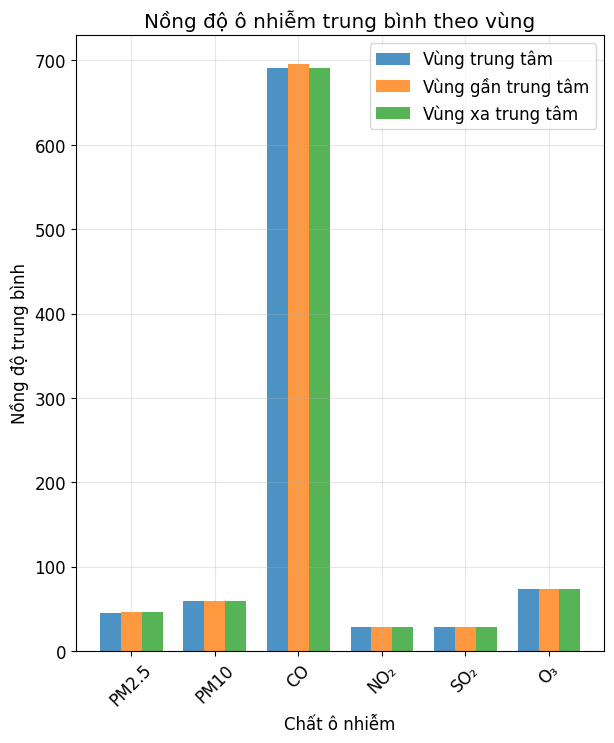

In [ ]:
# KIỂM TRA VÀ SỬA LỖI PHÂN VÙNG

## 1. Kiểm tra dữ liệu phân vùng hiện tại
print("KIỂM TRA PHÂN VÙNG HIỆN TẠI")
print("=" * 50)

# Kiểm tra các trạm unique trong dữ liệu
all_stations = data['location_id'].unique()
print(f"Tổng số trạm trong dữ liệu: {len(all_stations)}")
# print("Các trạm:", sorted(all_stations)) # Removed redundant print

# Kiểm tra phân bố vùng hiện tại
print(f"\nPhân bố vùng hiện tại:")
print(data['area'].value_counts(dropna=False))

# Kiểm tra trạm chưa được phân vùng
missing_area = data[data['area'].isna()]
if not missing_area.empty:
    print(f"\nCÓ {missing_area['location_id'].nunique()} TRẠM CHƯA ĐƯỢC PHÂN VÙNG:")
    unassigned_stations = missing_area['location_id'].unique()
    print("Các trạm chưa phân vùng:", unassigned_stations)
else:
    print("\nTẤT CẢ TRẠM ĐÃ ĐƯỢC PHÂN VÙNG")

## 2. ĐỊNH NGHĨA LẠI PHÂN VÙNG CHÍNH XÁC
print("\n" + "=" * 50)
print("ĐỊNH NGHĨA LẠI PHÂN VÙNG")
print("=" * 50)

# DANH SÁCH ĐẦY ĐỦ 31 TRẠM PHÂN THEO 3 VÙNG

center_ids = [
    2539,      # US Diplomatic Post-Hanoi (Ba Đình)
    7441,      # Hanoi
    1285357,   # SPARTAN - Vietnam Acad. Sci.
    2161291,   # Cầu Diễn
    2161292,   # Số 46, phố Lưu Quang Vũ
    2161293,   # Chúc Sơn
    2161296,   # Đào Duy Tú
    2161299,   # Hàng Đậu
    2161300,   # Hoàn Kiếm
    2161308    # Phạm Văn Đồng
]
# 10 trạm vùng trung tâm

near_center_ids = [
    2161298,   # Đồng Kinh Nghĩa Thực
    2161301,   # Khương Trung
    2161303,   # Kim Liên
    2161304,   # Lê Trực
    2161306,   # Minh Khai - Bắc Tứ Liên
    2161307,   # Mỹ Đình
    2161309,   # Pháp Văn
    2161318    # Tứ Liên
]
# 8 trạm vùng gần trung tâm

far_ids = [
    2161290,   # An Khánh
    2161294,   # Cung thiếu nhi
    2161295,   # Đấm Trâu
    2161313,   # Tân Mai
    2161314,   # Tây Hồ Tây
    2161315,   # Tây Mổ
    2161316,   # Thành Công
    2161320,   # Văn Hà
    2161321,   # Văn Quản
    2161322,   # Võng La
    4946811,   # Số Nguyễn Văn Cử
    4946812,   # Công viên hộ điều hòa Nhân Chính, Khuất Duy Tiến
    4946813    # ĐH Bách Khoa - cống Parabol đường Giải Phóng
]
# 13 trạm vùng xa trung tâm

# Kiểm tra tổng số trạm
total_defined = len(center_ids) + len(near_center_ids) + len(far_ids)
print(f"Tổng số trạm đã định nghĩa: {total_defined}")
print(f"- Vùng trung tâm: {len(center_ids)} trạm")
print(f"- Vùng gần trung tâm: {len(near_center_ids)} trạm")
print(f"- Vùng xa trung tâm: {len(far_ids)} trạm")

## 3. HÀM PHÂN VÙNG MỚI - BẮT BUỘC TẤT CẢ TRẠM PHẢI CÓ VÙNG
def map_area_complete(location_id):
    """Phân vùng đầy đủ cho tất cả trạm"""
    if location_id in center_ids:
        return "Vùng trung tâm"
    elif location_id in near_center_ids:
        return "Vùng gần trung tâm"
    elif location_id in far_ids:
        return "Vùng xa trung tâm"
    else:
        # Nếu có trạm không nằm trong danh sách, xử lý đặc biệt
        print(f"CẢNH BÁO: Trạm {location_id} không có trong danh sách phân vùng!")
        return "Vùng chưa xác định"  # Hoặc phân vào vùng phù hợp

# Áp dụng phân vùng mới
data['area'] = data['location_id'].apply(map_area_complete)

## 4. KIỂM TRA KẾT QUẢ PHÂN VÙNG MỚI
print("\n" + "=" * 50)
print("KẾT QUẢ PHÂN VÙNG SAU KHI SỬA")
print("=" * 50)

# Kiểm tra phân bố vùng mới
area_distribution = data['area'].value_counts()
print("Phân bố vùng mới:")
for area, count in area_distribution.items():
    stations_in_area = data[data['area'] == area]['location_id'].nunique()
    print(f"- {area}: {count} dữ liệu từ {stations_in_area} trạm")

# Kiểm tra chi tiết từng trạm thuộc vùng nào
print(f"\nCHI TIẾT PHÂN VÙNG TỪNG TRẠM:")
for station in sorted(data['location_id'].unique()):
    area = data[data['location_id'] == station]['area'].iloc[0]
    print(f"Trạm {station}: {area}")

## 5. PHÂN TÍCH Ô NHIỄM THEO PHÂN VÙNG MỚI
print("\n" + "=" * 50)
print("PHÂN TÍCH Ô NHIỄM THEO PHÂN VÙNG CHÍNH XÁC")
print("=" * 50)

# Chỉ phân tích 3 vùng chính (loại bỏ "Vùng chưa xác định" nếu có)
valid_areas = ["Vùng trung tâm", "Vùng gần trung tâm", "Vùng xa trung tâm"]
data_clean = data[data['area'].isin(valid_areas)].copy()

print(f"Số dữ liệu sau khi lọc 3 vùng chính: {len(data_clean)}")
print(f"Phân bố cuối cùng:")
print(data_clean['area'].value_counts())

## 6. VẼ LẠI BIỂU ĐỒ VỚI PHÂN VÙNG CHÍNH XÁ
pollutants = ['pm2_5_cams', 'pm10_cams', 'carbon_monoxide_cams',
              'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams']
pollutant_names = ['PM2.5', 'PM10', 'CO', 'NO₂', 'SO₂', 'O₃']

# Biểu đồ so sánh trung bình theo 3 vùng chính xác
plt.figure(figsize=(15, 8))

# Trung bình các chất ô nhiễm theo vùng
mean_by_area = data_clean.groupby('area')[pollutants].mean()

# Vẽ biểu đồ
x = np.arange(len(pollutants))
width = 0.25

plt.subplot(1, 2, 1)
for i, area in enumerate(valid_areas):
    values = mean_by_area.loc[area].values
    plt.bar(x + i*width, values, width, label=area, alpha=0.8)

plt.xlabel('Chất ô nhiễm')
plt.ylabel('Nồng độ trung bình')
plt.title('Nồng độ ô nhiễm trung bình theo vùng')
plt.xticks(x + width, pollutant_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

CO là khí phát thải chủ yếu từ quá trình đốt nhiên liệu không hoàn toàn, có khả năng khuếch tán rộng và tồn tại lâu trong khí quyển, các đặc tính phát thải và phạm vi nồng độ điển hình của CO vốn lớn hơn các chất khác nên thường xuất hiện với giá trị tuyệt đối cao hơn. Đây đặc trưng vật lý – hoá học bình thường.

#Phân tích từng chất

PHÂN TÍCH CHI TIẾT PM2.5
Thống kê PM2.5 theo vùng:
                       count       mean        std  min   25%   50%   75%    max
area                                                                            
Vùng gần trung tâm  225160.0  45.765179  27.193767  0.3  26.6  39.2  57.5  258.0
Vùng trung tâm      281450.0  45.616744  26.597623  0.3  26.7  39.5  57.6  232.8
Vùng xa trung tâm   365885.0  45.767429  26.764500  0.3  26.8  39.6  57.9  258.0


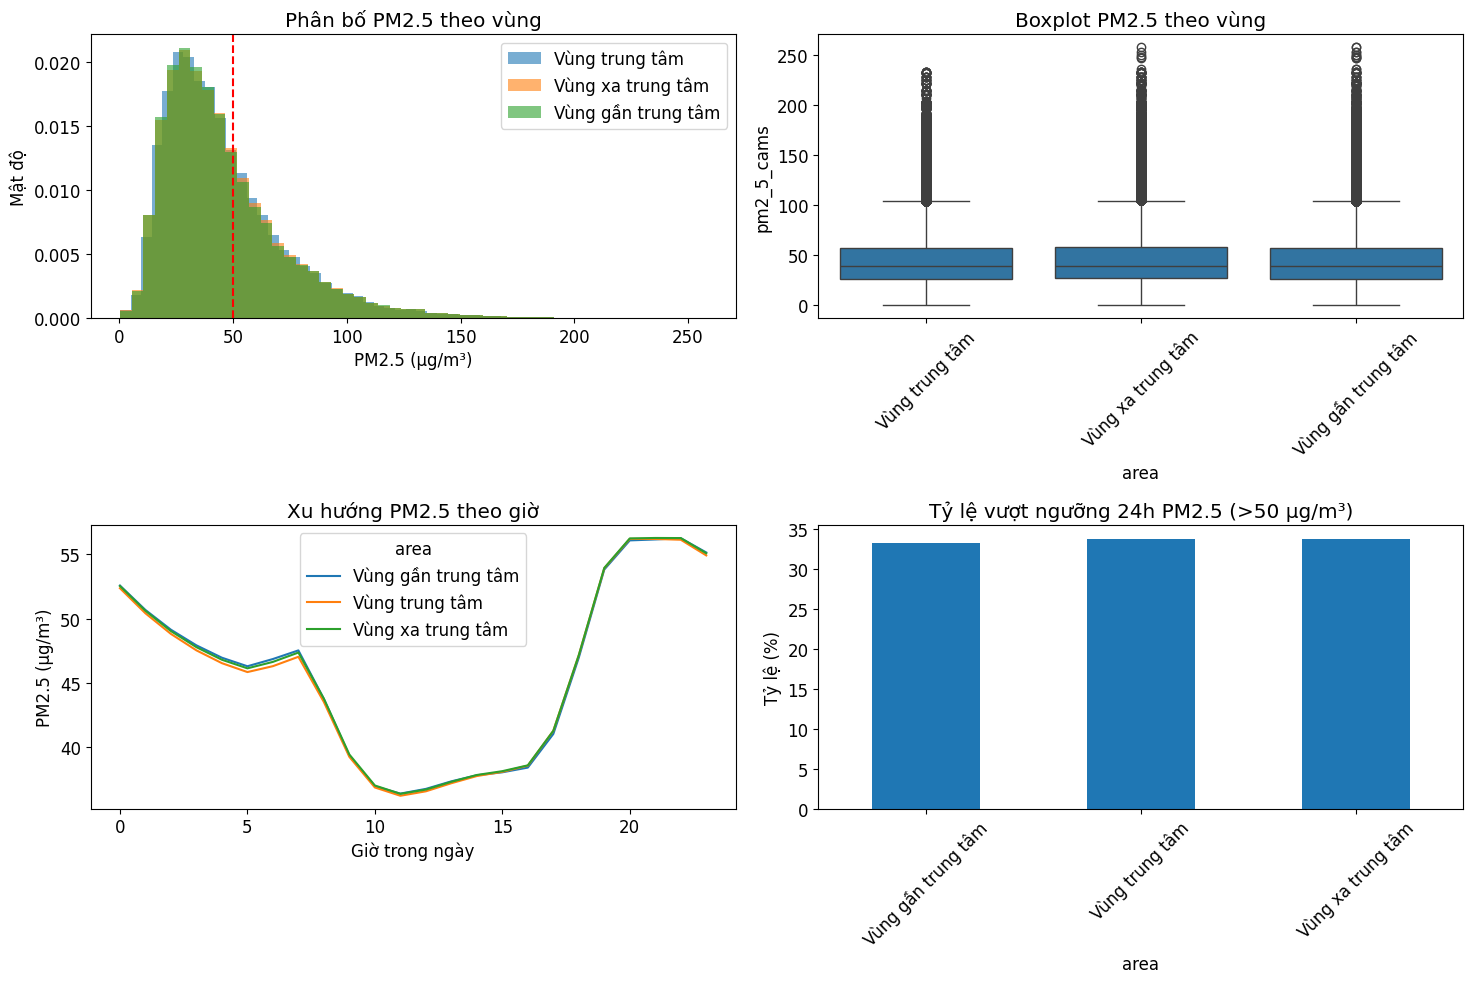


PM2.5 trung bình theo mùa:
area    Vùng gần trung tâm  Vùng trung tâm  Vùng xa trung tâm
season                                                       
Hè               46.561222       46.859486          46.901875
Thu              43.367131       42.467012          42.723224
Xuân             48.547010       48.665601          48.753325
Đông             45.185699       45.228891          45.418258


In [ ]:
# PHÂN TÍCH CHI TIẾT THEO TỪNG CHẤT Ô NHIỄM
from scipy import stats

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10) # Increased figure size

## 2. Phân tích PM2.5
print("=" * 60)
print("PHÂN TÍCH CHI TIẾT PM2.5")
print("=" * 60)

# Thống kê cơ bản
pm25_stats = data.groupby('area')['pm2_5_cams'].describe()
print("Thống kê PM2.5 theo vùng:")
print(pm25_stats)

# Phân bố PM2.5
plt.figure(figsize=(15, 10))

# Biểu đồ phân bố
plt.subplot(2, 2, 1)
for area in data['area'].unique():
    subset = data[data['area'] == area]['pm2_5_cams'].dropna() # Handle NaN values
    plt.hist(subset, bins=50, alpha=0.6, label=area, density=True)
plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('Mật độ')
plt.title('Phân bố PM2.5 theo vùng')
plt.legend()
plt.axvline(x=50, color='red', linestyle='--', label='Ngưỡng 24h QCVN')

# Boxplot theo vùng
plt.subplot(2, 2, 2)
sns.boxplot(x='area', y='pm2_5_cams', data=data)
plt.title('Boxplot PM2.5 theo vùng')
plt.xticks(rotation=45)

# Xu hướng theo giờ
plt.subplot(2, 2, 3)
# Grouping by hour and area
hourly_pm25 = data.groupby(['hour', 'area'])['pm2_5_cams'].mean().unstack()
hourly_pm25.plot(ax=plt.gca())
plt.title('Xu hướng PM2.5 theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('PM2.5 (μg/m³)')

# Tỷ lệ vượt ngưỡng
plt.subplot(2, 2, 4)
threshold_violations = data.groupby('area')['pm2_5_cams'].apply(
    lambda x: (x > 50).sum() / len(x) * 100
)
threshold_violations.plot(kind='bar')
plt.title('Tỷ lệ vượt ngưỡng 24h PM2.5 (>50 μg/m³)')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Phân tích theo mùa
data['season'] = data['month'].apply(lambda x: 'Xuân' if 1<=x<=3 else
                                   'Hè' if 4<=x<=6 else
                                   'Thu' if 7<=x<=9 else 'Đông')

seasonal_pm25 = data.groupby(['season', 'area'])['pm2_5_cams'].mean().unstack()
print("\nPM2.5 trung bình theo mùa:")
print(seasonal_pm25)

1. Nhận Xét

Nông độ trung bình PM25 trung bình gần như bằng nhau giữa ba vùng

Pm25 có tính chất vùng, bao trùm cả thành phố.

2. Phân tích chi tiết

*  biểu đồ phân bố

Các đường phân bố của 3 vùng chồng lấn gần như hoàn toàn lên nhau. Đây là bằng chứng trực quan nhất cho thấy phơi nhiễm PM2.5 là như nhau cho dù bạn ở trung tâm, ven đô hay ngoại thành.

* biểu đồ bõplot

 Trung vị: Của 3 vùng gần như bằng nhau và nằm ở khoảng 39-40 µg/m³. Điều này khẳng định lại lần nữa: giá trị điển hình (trung vị) về PM2.5 là giống nhau ở mọi nơi.

Kích thước hộp (IQR): Hộp của 3 vùng có kích thước tương đương, cho thấy mức độ biến động "thông thường" của PM2.5 là như nhau trên toàn thành phố.

Các điểm ngoại lệ (Outliers): Cả 3 vùng đều có rất nhiều điểm ngoại lệ vươn rất cao. Điều này cho thấy những đợt ô nhiễm nghiêm trọng (bụi mù) là hiện tượng phổ biến và xảy ra trên diện rộng, không chỉ cục bộ ở một vùng nào.


* biểu đồ xu hướng theo giờ

xu hướng chung theo giờ

Hai Đỉnh Ô nhiễm: Đỉnh cao nhất vào buổi sáng (6h - 8h) và một đỉnh thấp hơn vào buổi tối (19h - 21h).

Không khí Sạch nhất: Nồng độ PM2.5 thấp nhất vào buổi chiều (12h - 16h).

sự khác biệt giữa các vùng

Vùng Trung tâm (Cam):hiển thị rõ hầu hết thời gian trong ngày. Điều này chứng tỏ người dân ở trung tâm phải chịu mức PM2.5 cao hơn so với các vùng khác.

Vùng gần trung tâm (Xanh dương) và Vùng xa trung tâm (Xanh lá): Hai vùng này có đường nồng độ gần như trùng lặp và thấp hơn Vùng Trung tâm.

->Về mặt ô nhiễm theo giờ, Trung tâm là nơi có không khí kém nhất gần như suốt cả ngày, trong khi các vùng còn lại có mức phơi nhiễm theo giờ tương đồng nhau.


* biểu đồ tỷ lệ vượt ngưỡng

mức độ ô nhiễm rộng - cả 3 vùng đều có tỷ lệ vượt ngưỡng trên 30% - 1/3 thời gian trong ngày người dân phải sống trong tình trạng không khí không an toàn

* trung bình theo mùa

Ô Nhiễm Cao Liên Tục: Mức PM2.5 trung bình luôn cao (trên $42 \mu g/m^3$) ở mọi mùa, không mùa nào đạt chuẩn an toàn dài hạn ($25 \mu g/m^3$).

Đỉnh Mùa Hè - Thu Tốt Nhất: Mùa Xuân và Hè là thời kỳ ô nhiễm cao nhất (khoảng $47 - 48 \mu g/m^3$). Mùa Thu là mùa "dễ thở" nhất (nhưng vẫn ô nhiễm).

Mọi Vùng Đều Giống Nhau: Sự khác biệt PM2.5 trung bình giữa Trung tâm, Gần trung tâm và Xa trung tâm là không đáng kể (chỉ $0.x \mu g/m^3$).

3. insight về pm25

mức pm25 trung bình và độ biến động là như nhau ở cả 3 vùng

chất lượng kkhi vượt ngưỡng hơn 1/3 thời gian -> ô nhiễm cao

giao thông là nguyên nhân gây ra 2 đỉnh ô nhiễm hằng ngày





PHÂN TÍCH CHI TIẾT PM10
Thống kê PM10 theo vùng:
                       count       mean        std  min   25%   50%   75%    max
area                                                                            
Vùng gần trung tâm  225160.0  59.757219  33.767699  0.4  35.6  51.8  75.4  291.5
Vùng trung tâm      281450.0  59.538939  33.120051  0.4  35.7  52.2  75.4  291.5
Vùng xa trung tâm   365885.0  59.728886  33.274925  0.4  35.7  52.2  75.7  291.5


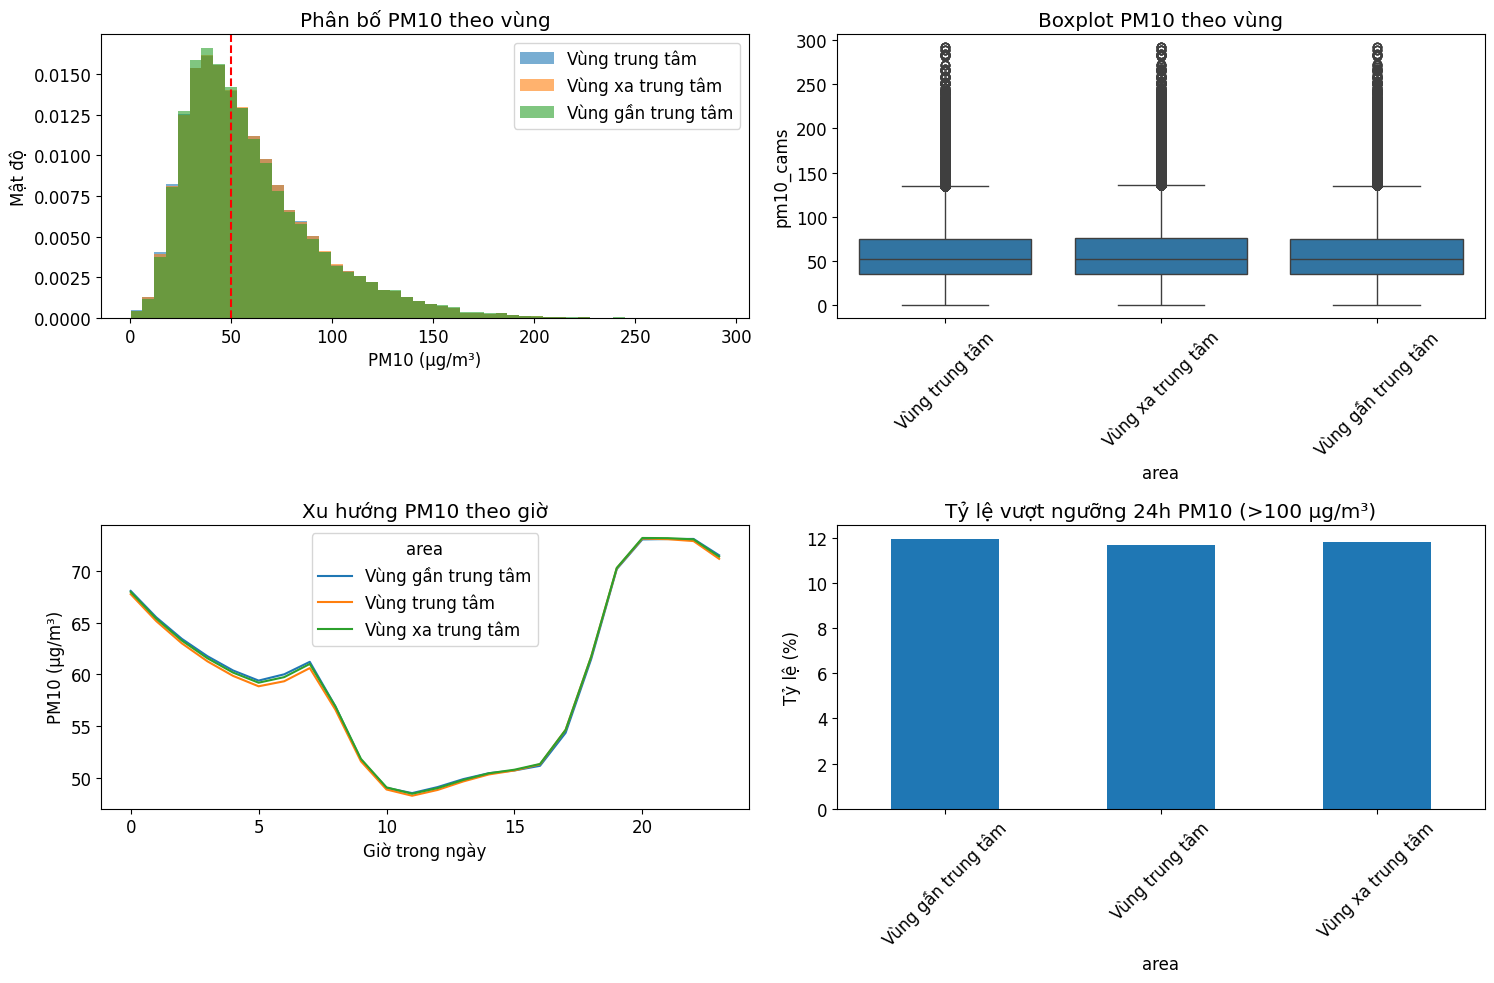


PM10 trung bình theo mùa:
area    Vùng gần trung tâm  Vùng trung tâm  Vùng xa trung tâm
season                                                       
Hè               60.230220       60.630629          60.662670
Thu              56.338900       55.216615          55.532991
Xuân             62.722036       62.809096          62.920635
Đông             60.462733       60.414031          60.679118


In [ ]:
## 3. Phân tích PM10
print("\n" + "=" * 60)
print("PHÂN TÍCH CHI TIẾT PM10")
print("=" * 60)

pm10_stats = data.groupby('area')['pm10_cams'].describe()
print("Thống kê PM10 theo vùng:")
print(pm10_stats)
# Phân bố PM2.5
plt.figure(figsize=(15, 10))

# Biểu đồ phân bố
plt.subplot(2, 2, 1)
for area in data['area'].unique():
    subset = data[data['area'] == area]['pm10_cams'].dropna() # Handle NaN values
    plt.hist(subset, bins=50, alpha=0.6, label=area, density=True)
plt.xlabel('PM10 (μg/m³)')
plt.ylabel('Mật độ')
plt.title('Phân bố PM10 theo vùng')
plt.legend()
plt.axvline(x=50, color='red', linestyle='--', label='Ngưỡng 24h QCVN')

# Boxplot theo vùng
plt.subplot(2, 2, 2)
sns.boxplot(x='area', y='pm10_cams', data=data)
plt.title('Boxplot PM10 theo vùng')
plt.xticks(rotation=45)

# Xu hướng theo giờ
plt.subplot(2, 2, 3)
# Grouping by hour and area
hourly_pm25 = data.groupby(['hour', 'area'])['pm10_cams'].mean().unstack()
hourly_pm25.plot(ax=plt.gca())
plt.title('Xu hướng PM10 theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('PM10 (μg/m³)')

# Tỷ lệ vượt ngưỡng
plt.subplot(2, 2, 4)
threshold_violations = data.groupby('area')['pm10_cams'].apply(
    lambda x: (x > 100).sum() / len(x) * 100
)
threshold_violations.plot(kind='bar')
plt.title('Tỷ lệ vượt ngưỡng 24h PM10 (>100 μg/m³)')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Phân tích theo mùa
data['season'] = data['month'].apply(lambda x: 'Xuân' if 1<=x<=3 else
                                   'Hè' if 4<=x<=6 else
                                   'Thu' if 7<=x<=9 else 'Đông')

seasonal_pm10 = data.groupby(['season', 'area'])['pm10_cams'].mean().unstack()
print("\nPM10 trung bình theo mùa:")
print(seasonal_pm10)


1. nhận xét

Nông độ trung bình PM10 trung bình gần như bằng nhau giữa ba vùng

Pm10 có tính chất vùng, bao trùm cả thành phố.

2. chi tiết

* biểu đồ phân bố pm10 theo vùng

phân bố pm10 ở 3 vùng gần như xếp chồng lên nhau, phần đuôi kéo dài đến >200 µg/m³ phản ánh các đợt ô nhiễm cục bộ (bụi xây dựng, giao thông, thời tiết nghịch).

* biểu đồ boxplot

Các vùng có trung vị và tứ phân vị gần như tương đương, chứng tỏ không có sự khác biệt rõ ràng giữa trung tâm và vùng ven.

Tuy nhiên, các điểm ngoại lai (outliers) xuất hiện khá dày, vượt 250 µg/m³, cho thấy một số thời điểm xuất hiện đột biến ô nhiễm cục bộ (có thể do giao thông, xây dựng hoặc thời tiết bất lợi).

* biểu đồ xu hướng pm10 theo giờ

PM₁₀ giảm dần từ nửa đêm đến sáng sớm 0h-5h, sau đó tăng mạnh vào khoảng 16h-20h

cho thấy ảnh hưởng rõ của hoạt động giao thông và khí tượng học: buổi sáng gió khuếch tán mạnh hơn, còn buổiv chièu tối nghịch nhiệt làm bụi tích tụ

* biểu đồ tỷ lệ vượt ngưỡng

Ba vùng có tỷ lệ vượt ngưỡng gần như bằng nhau (~12%), cho thấy nguồn phát thải lan tỏa, không chỉ tập trung tại trung tâm.

* pm10 theo mùa

Nồng độ PM₁₀ dao động 55–63 µg/m³, cao nhất mùa Xuân, thấp nhất mùa Thu.
Ba vùng có mức tương đồng → nguồn bụi và điều kiện khuếch tán tương tự.
Mùa Xuân – Đông ô nhiễm cao do ít mưa, nghịch nhiệt; mùa Thu sạch hơn nhờ thời tiết ổn định, mưa nhiều.

3, insight pm10

Mức ô nhiễm bụi PM₁₀ cao mang tính toàn vùng, bị ảnh hưởng bởi yếu tố khí tượng


PHÂN TÍCH CHI TIẾT CARBON MONOXIDE (CO)
Thống kê CO theo vùng:
                       count        mean         std   min    25%    50%    75%     max
area                                                                                   
Vùng gần trung tâm  225160.0  695.365482  426.778138  59.0  428.0  573.0  817.0  5190.0
Vùng trung tâm      281450.0  691.525447  413.730614  59.0  429.0  574.0  816.0  5190.0
Vùng xa trung tâm   365885.0  690.783590  413.262358  59.0  429.0  573.0  813.0  5190.0


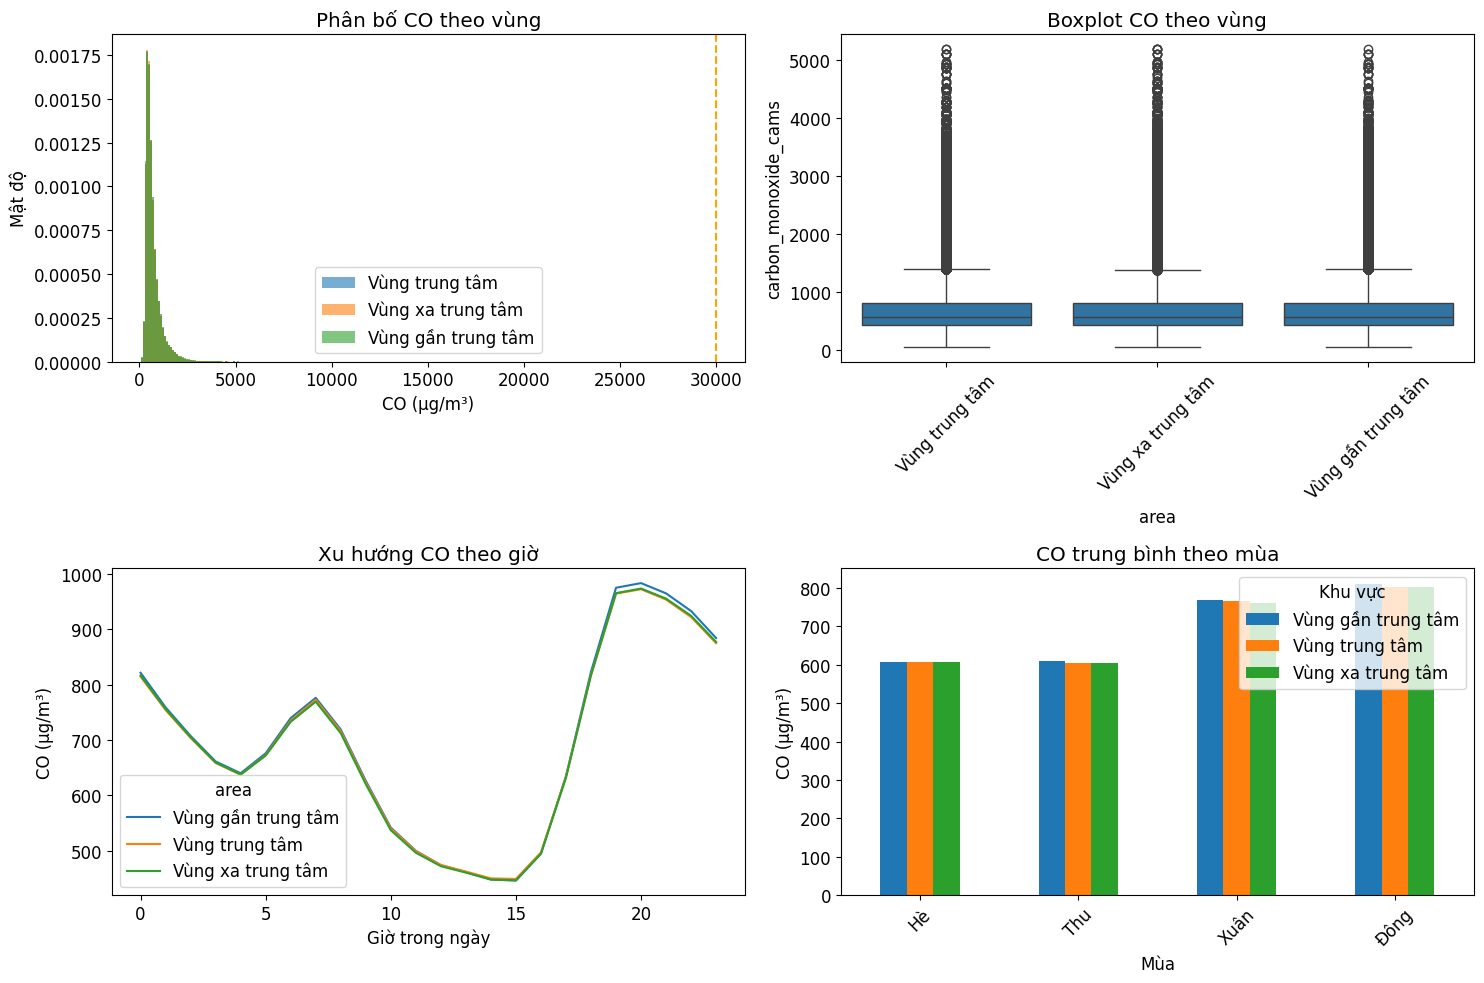

In [ ]:
# BỔ SUNG PHÂN TÍCH VÀ BIỂU ĐỒ CHO CO, NO2, SO2, O3

## 1. Phân tích chi tiết Carbon Monoxide (CO)
print("\n" + "=" * 60)
print("PHÂN TÍCH CHI TIẾT CARBON MONOXIDE (CO)")
print("=" * 60)

# Thống kê CO
co_stats = data.groupby('area')['carbon_monoxide_cams'].describe()
print("Thống kê CO theo vùng:")
print(co_stats)

# Vẽ biểu đồ cho CO
plt.figure(figsize=(15, 10))

# Biểu đồ 1: Phân bố CO
plt.subplot(2, 2, 1)
for area in data['area'].unique():
    subset = data[data['area'] == area]['carbon_monoxide_cams'].dropna()
    plt.hist(subset, bins=50, alpha=0.6, label=area, density=True)
plt.xlabel('CO (μg/m³)')
plt.ylabel('Mật độ')
plt.title('Phân bố CO theo vùng')
plt.legend()
plt.axvline(x=30000, color='orange', linestyle='--', label='Ngưỡng 1h QCVN')

# Biểu đồ 2: Boxplot CO
plt.subplot(2, 2, 2)
sns.boxplot(x='area', y='carbon_monoxide_cams', data=data)
plt.title('Boxplot CO theo vùng')
plt.xticks(rotation=45)

# Biểu đồ 3: Xu hướng CO theo giờ
plt.subplot(2, 2, 3)
hourly_co = data.groupby(['hour', 'area'])['carbon_monoxide_cams'].mean().unstack()
hourly_co.plot(ax=plt.gca())
plt.title('Xu hướng CO theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('CO (μg/m³)')

# Phân tích CO theo mùa vùng
data['season'] = data['month'].apply(lambda x: 'Xuân' if 1<=x<=3 else
                                      'Hè' if 4<=x<=6 else
                                      'Thu' if 7<=x<=9 else 'Đông')
seasonal_co = data.groupby(['season', 'area'])['carbon_monoxide_cams'].mean().unstack()
plt.subplot(2, 2, 4)
seasonal_co.plot(kind='bar', ax=plt.gca())
plt.title('CO trung bình theo mùa')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Mùa')
plt.xticks(rotation=45)
plt.legend(title='Khu vực')
plt.tight_layout()
plt.show()


#Sao hai cái trên đang là vượt ngưỡng 24h mà dưới dây là 1h r biểu đồ gì kỳ vậy, cái tỷ lệ trung bình đâu chọn theo vùng hoặc theo mùa tùy nma chọn 1 cái thôi và insight


bài hôm trwuosc t tình bày r mà pm25 pm10 ko có ngưỡng theo giờ chỉ có ngưỡng 24h thôi còn mấy cái còn lại thì có nên phải làm theo giờ chứ

1. nhận xxets chung    **co ko có vưở ngưỡng k vẽ**

Nồng độ CO trung bình giữa ba vùng gần như tương đương (~690–695 µg/m³), cho thấy ô nhiễm CO có tính lan tỏa toàn đô thị, không khác biệt rõ giữa khu trung tâm và vùng ven.

Mức trung bình tuy nằm trong giới hạn cho phép, nhưng độ lệch chuẩn lớn phản ánh dao động mạnh theo thời gian và điều kiện khí tượng.

2. chi tiết

• Biểu đồ phân bố CO theo vùng

Ba đường phân bố gần như trùng nhau, tập trung chủ yếu ở mức <1000 µg/m³, cho thấy hầu hết thời điểm nồng độ CO thấp.

Tuy nhiên, phần đuôi kéo dài tới >5000 µg/m³ phản ánh các đợt ô nhiễm cục bộ (thường do giao thông hoặc đốt nhiên liệu).

• Biểu đồ Boxplot CO theo vùng

Trung vị và tứ phân vị gần như giống nhau giữa các vùng → không có chênh lệch không gian rõ rệt.

Nhiều điểm ngoại lai (vượt 4000–5000 µg/m³) cho thấy vẫn tồn tại một số thời điểm phát thải đột biến, chủ yếu ở khu vực giao thông dày đặc.

• Biểu đồ xu hướng CO theo giờ

CO giảm dần từ nửa đêm đến trưa (0–14h) và tăng mạnh trở lại từ 16h–21h, trùng với khung giờ giao thông cao điểm.

Điều này cho thấy giao thông là nguồn phát thải chính, đồng thời nghịch nhiệt buổi tối làm khí khó khuếch tán.

• Biểu đồ tỷ lệ vượt ngưỡng

Hầu như không có thời điểm nào vượt ngưỡng 1h của WHO (30.000 µg/m³) → ô nhiễm CO chưa đến mức nguy hại sức khỏe cấp tính.

• CO trung bình theo mùa

trung bình theo mùa dao động mạnh, cao nhất vào mùa Đông (~805 µg/m³) và mùa Xuân (~765 µg/m³), thấp hơn rõ rệt vào mùa Hè – Thu (~605 µg/m³).

Ba vùng có mức ô nhiễm tương đương nhau, cho thấy ô nhiễm bụi mang tính lan tỏa toàn khu vực, không chỉ tập trung ở trung tâm.

Mức tăng mạnh trong mùa Đông – Xuân có thể liên quan đến nghịch nhiệt, ít mưa và gió yếu, khiến bụi tích tụ nhiều hơn trong không khí.

3. insight

Ô nhiễm CO có tính lan tỏa không gian cao, ít khác biệt giữa các vùng.

Giao thông và nghịch nhiệt buổi tối là yếu tố ảnh hưởng chính đến biến động nồng độ CO theo giờ.

Xu hướng mùa vụ rõ rệt: CO cao vào mùa lạnh → cần theo dõi chặt trong các tháng Đông – Xuân, đặc biệt ở khu vực mật độ xe cao.



PHÂN TÍCH CHI TIẾT NITROGEN DIOXIDE (NO2)
Thống kê NO2 theo vùng:
                       count       mean        std  min   25%   50%    75%    max
area                                                                             
Vùng gần trung tâm  225160.0  28.804585  20.874421  0.0  13.8  23.7  37.70  202.5
Vùng trung tâm      281450.0  28.283851  20.580465  0.0  13.3  23.4  37.35  202.5
Vùng xa trung tâm   365885.0  28.559915  20.679564  0.0  13.5  23.6  37.70  202.5


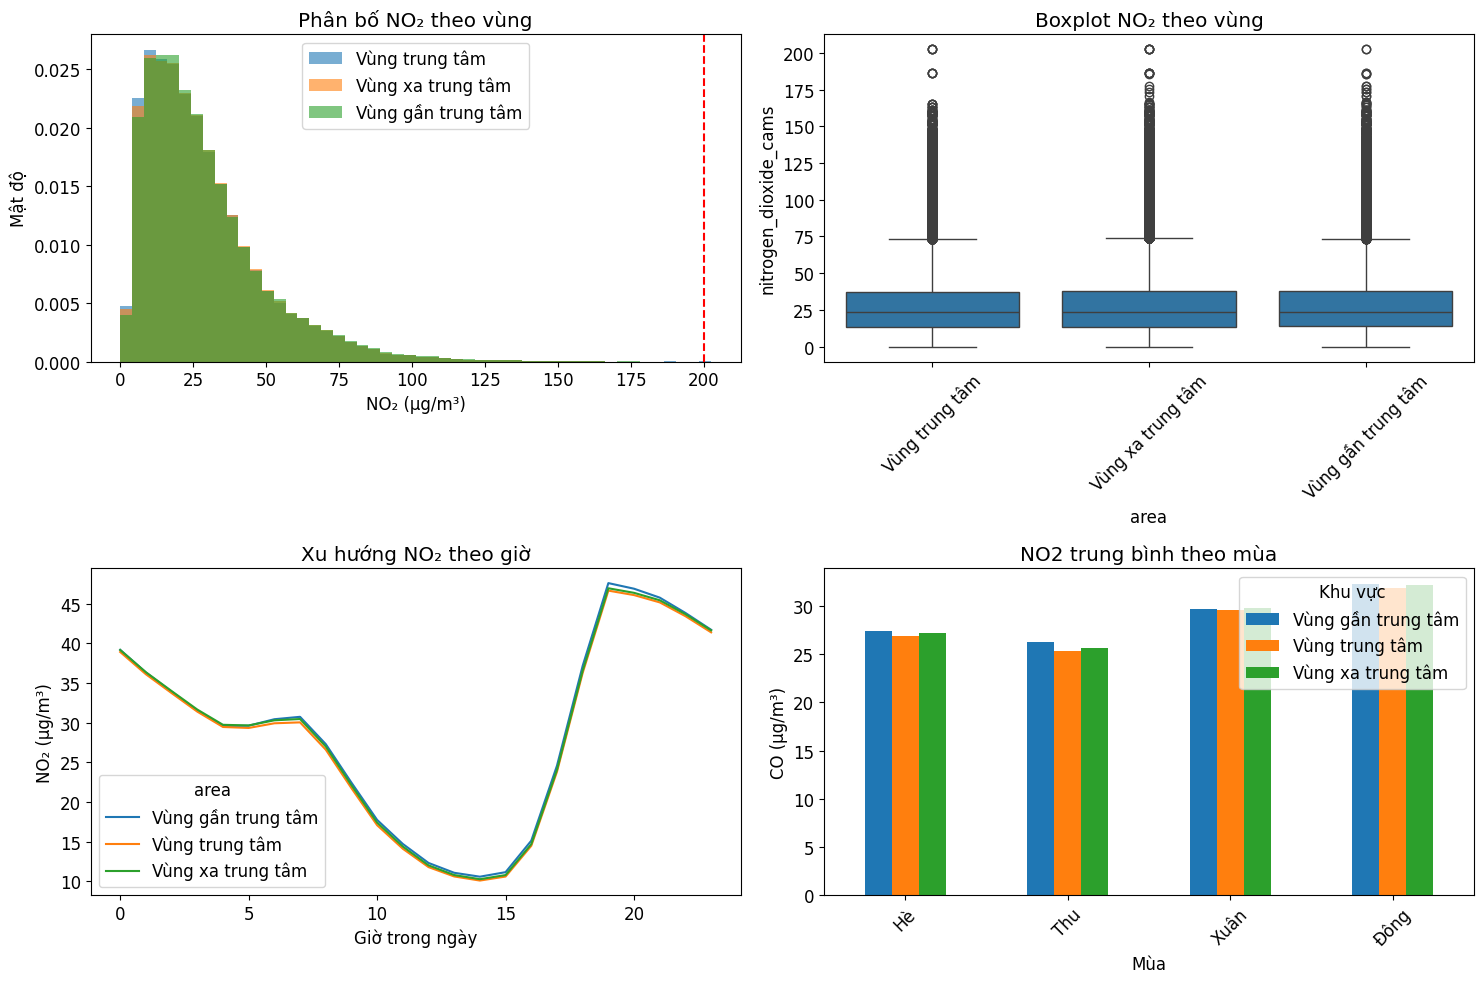

In [ ]:
## 2. Phân tích chi tiết Nitrogen Dioxide (NO2)
print("\n" + "=" * 60)
print("PHÂN TÍCH CHI TIẾT NITROGEN DIOXIDE (NO2)")
print("=" * 60)

# Thống kê NO2
no2_stats = data.groupby('area')['nitrogen_dioxide_cams'].describe()
print("Thống kê NO2 theo vùng:")
print(no2_stats)

# Vẽ biểu đồ cho NO2
plt.figure(figsize=(15, 10))

# Biểu đồ 1: Phân bố NO2
plt.subplot(2, 2, 1)
for area in data['area'].unique():
    subset = data[data['area'] == area]['nitrogen_dioxide_cams'].dropna()
    plt.hist(subset, bins=50, alpha=0.6, label=area, density=True)
plt.xlabel('NO₂ (μg/m³)')
plt.ylabel('Mật độ')
plt.title('Phân bố NO₂ theo vùng')
plt.legend()
plt.axvline(x=200, color='red', linestyle='--', label='Ngưỡng 1h QCVN')

# Biểu đồ 2: Boxplot NO2
plt.subplot(2, 2, 2)
sns.boxplot(x='area', y='nitrogen_dioxide_cams', data=data)
plt.title('Boxplot NO₂ theo vùng')
plt.xticks(rotation=45)

# Biểu đồ 3: Xu hướng NO2 theo giờ
plt.subplot(2, 2, 3)
hourly_no2 = data.groupby(['hour', 'area'])['nitrogen_dioxide_cams'].mean().unstack()
hourly_no2.plot(ax=plt.gca())
plt.title('Xu hướng NO₂ theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('NO₂ (μg/m³)')

# Phân tích CO theo mùa vùng
data['season'] = data['month'].apply(lambda x: 'Xuân' if 1<=x<=3 else
                                      'Hè' if 4<=x<=6 else
                                      'Thu' if 7<=x<=9 else 'Đông')
seasonal_no2 = data.groupby(['season', 'area'])['nitrogen_dioxide_cams'].mean().unstack()
plt.subplot(2, 2, 4)
seasonal_no2.plot(kind='bar', ax=plt.gca())
plt.title('NO2 trung bình theo mùa')
plt.ylabel('CO (μg/m³)')
plt.xlabel('Mùa')
plt.xticks(rotation=45)
plt.legend(title='Khu vực')
plt.tight_layout()
plt.show()

### Insight về NO₂

1.  **Nguồn phát thải chính:** Tương tự như CO, xu hướng theo giờ của NO₂ với các đỉnh rõ rệt vào giờ cao điểm buổi sáng và tối cho thấy giao thông là nguồn đóng góp chính.
2.  **Phân bố không gian:** Mức độ NO₂ khá tương đồng giữa các vùng, nhưng các trạm ở khu vực trung tâm và gần trung tâm có nồng độ trung bình nhỉnh hơn một chút so với vùng xa trung tâm. Điều này phản ánh sự tập trung của nguồn phát thải (giao thông) ở các khu vực đô thị sầm uất.
3.  **Xu hướng mùa vụ:** NO₂ có xu hướng cao hơn vào mùa Đông và Xuân, khi điều kiện khí tượng (nghịch nhiệt, ít gió) làm giảm khả năng khuếch tán khí thải.
4.  **Mối liên hệ với Ozone:** NO₂ là tiền chất quan trọng của Ozone. Mối tương quan âm giữa NO₂ và O₃ (thường thấy trong các phân tích tương quan) là đặc trưng của phản ứng hóa học trong khí quyển: NO₂ bị phân hủy để tạo ra O₃ dưới ánh sáng mặt trời, đồng thời O₃ cũng phản ứng với NO để tạo lại NO₂.


PHÂN TÍCH CHI TIẾT SULPHUR DIOXIDE (SO2)
Thống kê SO2 theo vùng:
                       count       mean        std  min   25%   50%   75%    max
area                                                                            
Vùng gần trung tâm  225160.0  28.018362  13.850825  0.2  18.2  25.6  35.3  128.2
Vùng trung tâm      281450.0  28.001257  14.337909  0.2  17.6  25.5  35.6  128.2
Vùng xa trung tâm   365885.0  28.212039  14.311269  0.2  17.9  25.8  35.8  128.2


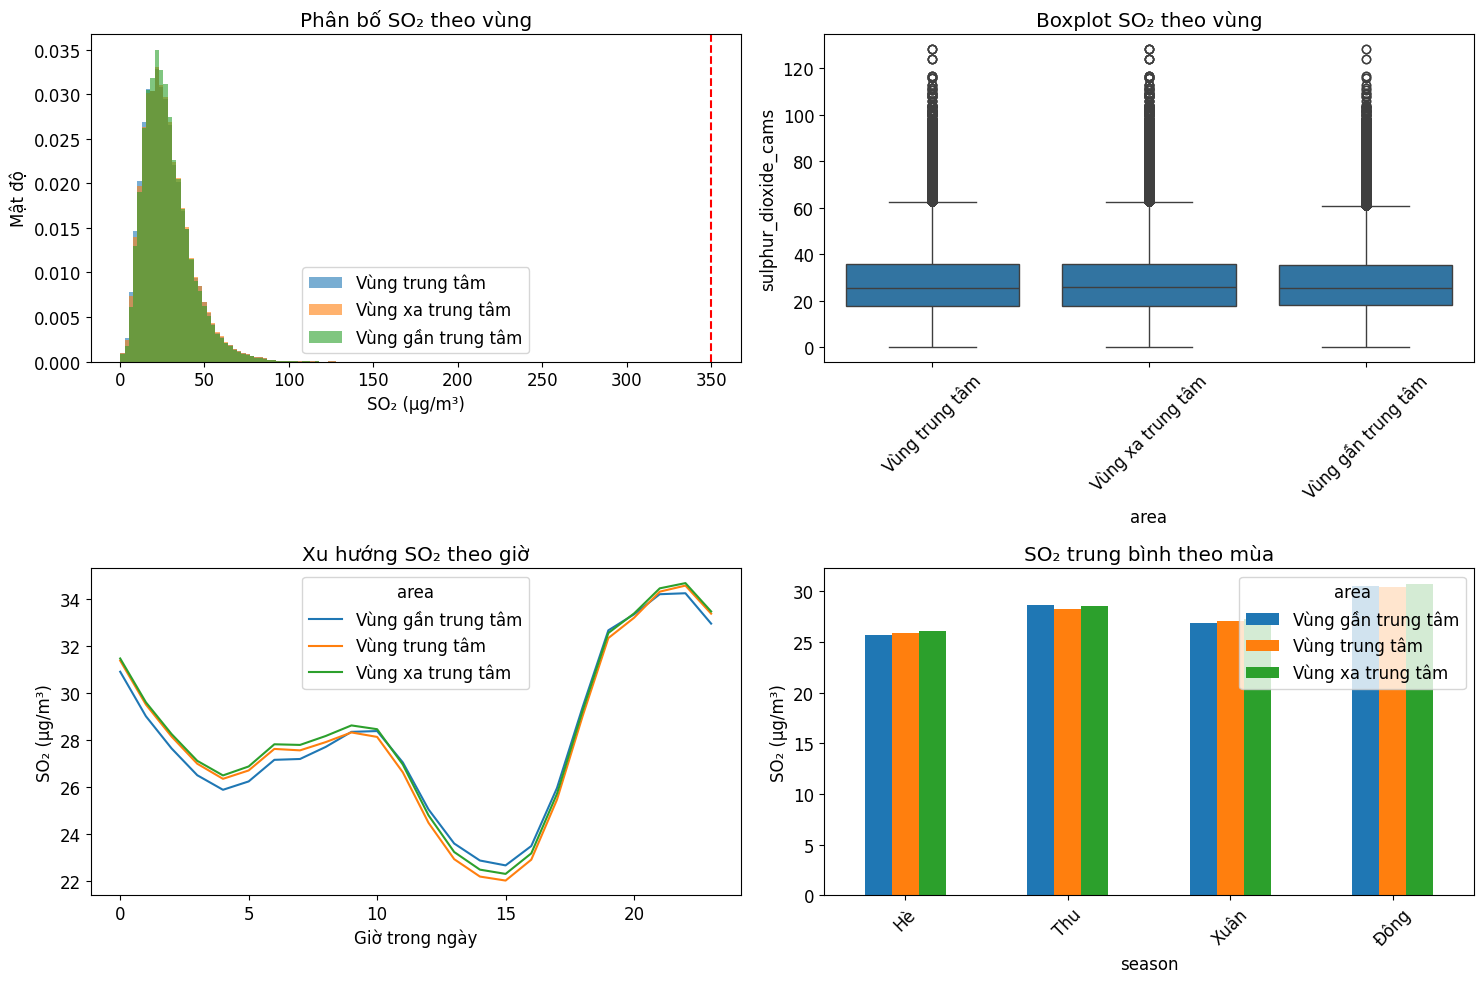

In [ ]:
## 3. Phân tích chi tiết Sulphur Dioxide (SO2)
print("\n" + "=" * 60)
print("PHÂN TÍCH CHI TIẾT SULPHUR DIOXIDE (SO2)")
print("=" * 60)

# Thống kê SO2
so2_stats = data.groupby('area')['sulphur_dioxide_cams'].describe()
print("Thống kê SO2 theo vùng:")
print(so2_stats)

# Vẽ biểu đồ cho SO2
plt.figure(figsize=(15, 10))

# Biểu đồ 1: Phân bố SO2
plt.subplot(2, 2, 1)
for area in data['area'].unique():
    subset = data[data['area'] == area]['sulphur_dioxide_cams'].dropna()
    plt.hist(subset, bins=50, alpha=0.6, label=area, density=True)
plt.xlabel('SO₂ (μg/m³)')
plt.ylabel('Mật độ')
plt.title('Phân bố SO₂ theo vùng')
plt.legend()
plt.axvline(x=350, color='red', linestyle='--', label='Ngưỡng 1h QCVN')

# Biểu đồ 2: Boxplot SO2
plt.subplot(2, 2, 2)
sns.boxplot(x='area', y='sulphur_dioxide_cams', data=data)
plt.title('Boxplot SO₂ theo vùng')
plt.xticks(rotation=45)

# Biểu đồ 3: Xu hướng SO2 theo giờ
plt.subplot(2, 2, 3)
hourly_so2 = data.groupby(['hour', 'area'])['sulphur_dioxide_cams'].mean().unstack()
hourly_so2.plot(ax=plt.gca())
plt.title('Xu hướng SO₂ theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('SO₂ (μg/m³)')

# Biểu đồ 4: SO2 theo mùa
plt.subplot(2, 2, 4)
seasonal_so2 = data.groupby(['season', 'area'])['sulphur_dioxide_cams'].mean().unstack()
seasonal_so2.plot(kind='bar', ax=plt.gca())
plt.title('SO₂ trung bình theo mùa')
plt.ylabel('SO₂ (μg/m³)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



phân tích SO₂     **SO2 ko có vượt ngưỡng k vẽ**

Nồng độ SO₂ trung bình ($\sim 28 \text{ } \mu \text{g/m}^3$) 3 cùng tương đương nhau

 Biến động vừa phải ($\text{STD} \sim 14 \text{ } \mu \text{g/m}^3$) và tập trung chủ yếu ở mức thấp.


 Không có sự khác biệt đáng kể về nồng độ và độ phân tán giữa Vùng Trung tâm, Gần Trung tâm và Xa Trung tâm (Biểu đồ Boxplot giống hệt nhau). Nguồn phát thải/phân tán đồng đều.

Nồng độ $\text{SO}_2$ nhìn chung ở mức an toàn nhưng có sự biến thiên lớn theo giờ (đỉnh đêm muộn do nghịch nhiệt) và có xu hướng tăng nhẹ vào mùa Thu/Đông.





#xuống đây thì theo mùa sao biểu đồ thứ 4 mỗi cái 1 kiểu vậy và insight đâu

PHÂN TÍCH CHI TIẾT OZONE (O3)
Thống kê O3 theo vùng:
                       count       mean        std  min   25%   50%    75%    max
area                                                                             
Vùng gần trung tâm  225160.0  73.267086  55.673768  0.0  33.0  57.0  100.0  383.0
Vùng trung tâm      281450.0  73.941325  55.736366  0.0  34.0  58.0  102.0  402.0
Vùng xa trung tâm   365885.0  73.698245  55.776988  0.0  33.0  57.0  101.0  402.0


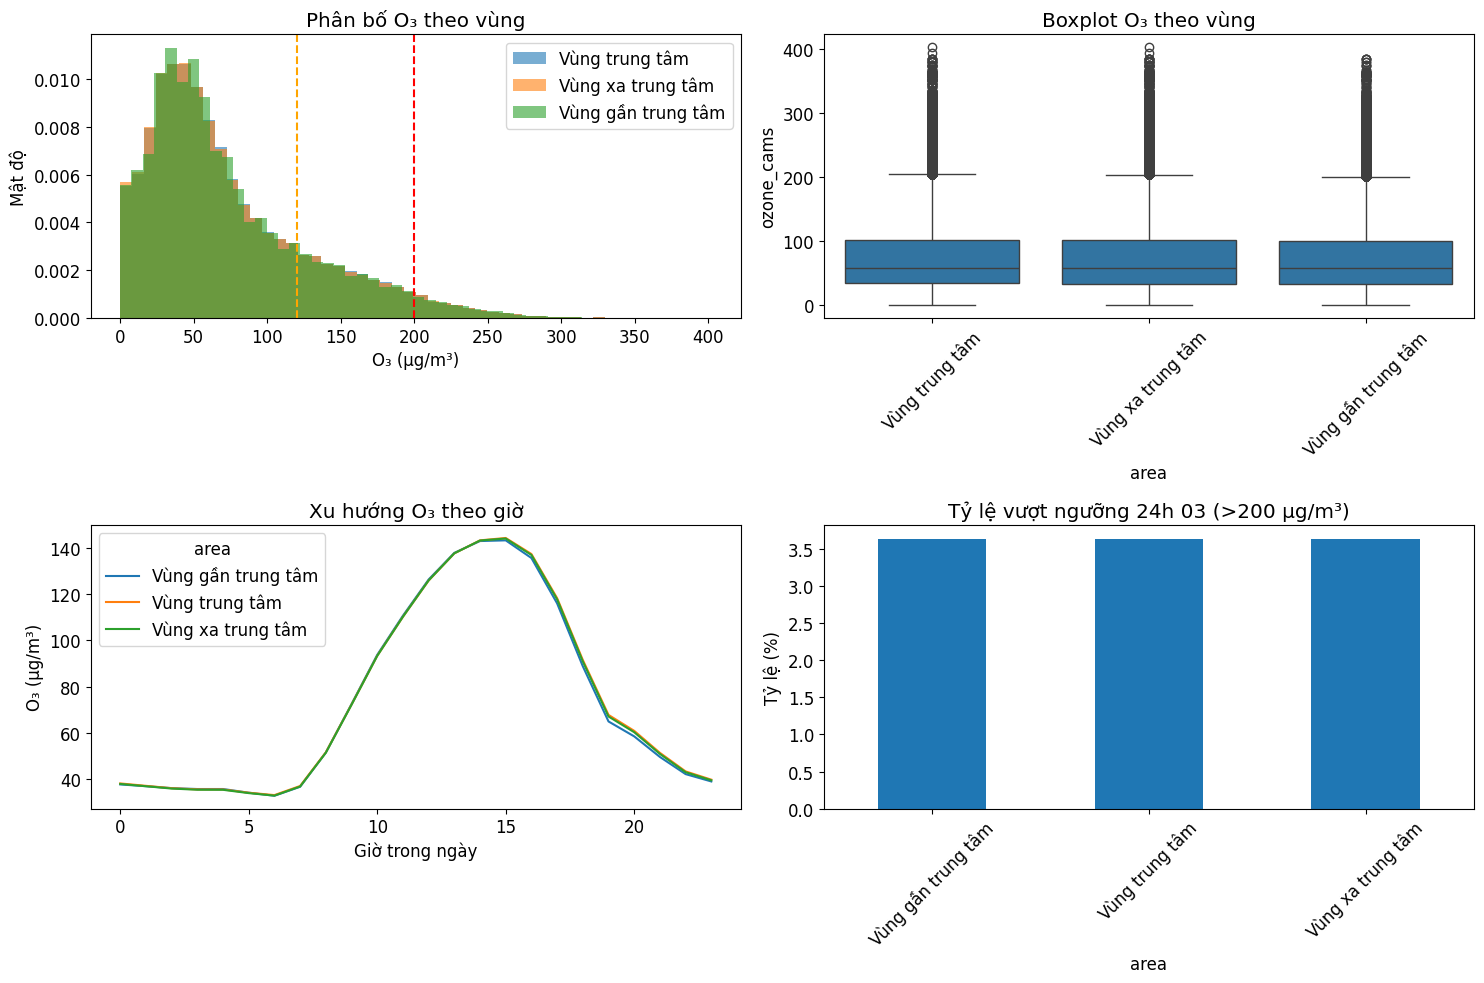


O3 trung bình theo mùa:
area    Vùng gần trung tâm  Vùng trung tâm  Vùng xa trung tâm
season                                                       
Hè               89.673344       90.318086          90.057129
Thu              84.429626       85.503783          85.221775
Xuân             58.615121       58.804566          58.629305
Đông             58.917055       59.611554          59.366754


In [ ]:
## 4. Phân tích chi tiết Ozone (O3)
print("PHÂN TÍCH CHI TIẾT OZONE (O3)")

# Thống kê O3
o3_stats = data.groupby('area')['ozone_cams'].describe()
print("Thống kê O3 theo vùng:")
print(o3_stats)

# Vẽ biểu đồ cho O3
plt.figure(figsize=(15, 10))

# Biểu đồ 1: Phân bố O3
plt.subplot(2, 2, 1)
for area in data['area'].unique():
    subset = data[data['area'] == area]['ozone_cams'].dropna()
    plt.hist(subset, bins=50, alpha=0.6, label=area, density=True)
plt.xlabel('O₃ (μg/m³)')
plt.ylabel('Mật độ')
plt.title('Phân bố O₃ theo vùng')
plt.legend()
plt.axvline(x=200, color='red', linestyle='--', label='Ngưỡng 1h QCVN')
plt.axvline(x=120, color='orange', linestyle='--', label='Ngưỡng 8h QCVN')

# Biểu đồ 2: Boxplot O3
plt.subplot(2, 2, 2)
sns.boxplot(x='area', y='ozone_cams', data=data)
plt.title('Boxplot O₃ theo vùng')
plt.xticks(rotation=45)

# Biểu đồ 3: Xu hướng O3 theo giờ
plt.subplot(2, 2, 3)
hourly_o3 = data.groupby(['hour', 'area'])['ozone_cams'].mean().unstack()
hourly_o3.plot(ax=plt.gca())
plt.title('Xu hướng O₃ theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('O₃ (μg/m³)')


# Tỷ lệ vượt ngưỡng
plt.subplot(2, 2, 4)
threshold_violations = data.groupby('area')['ozone_cams'].apply(
    lambda x: (x > 200).sum() / len(x) * 100
)
threshold_violations.plot(kind='bar')
plt.title('Tỷ lệ vượt ngưỡng 24h 03 (>200 μg/m³)')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Phân tích theo mùa
data['season'] = data['month'].apply(lambda x: 'Xuân' if 1<=x<=3 else
                                   'Hè' if 4<=x<=6 else
                                   'Thu' if 7<=x<=9 else 'Đông')

seasonal_o3 = data.groupby(['season', 'area'])['ozone_cams'].mean().unstack()
print("\nO3 trung bình theo mùa:")
print(seasonal_o3)

Phân bố & Tính đồng nhất: Nồng độ trung bình ($\sim 74 \text{ } \mu \text{g/m}^3$) tương đồng tuyệt đối giữa Vùng Trung tâm, Gần Trung tâm và Xa Trung tâm. Điều này chỉ ra rằng $\text{O}_3$ là vấn đề ô nhiễm trên quy mô toàn thành phố, độc lập với vị trí phát thải cục bộ .

Biến động:$\text{O}_3$ có độ biến động rất cao ($\text{STD} \sim 56 \text{ } \mu \text{g/m}^3$).
Khoảng $3.7\%$ thời gian vượt ngưỡng cảnh báo nghiêm trọng ($>200 \text{ } \mu \text{g/m}^3$).

Xu hướng Thời gian (Quan hệ Quang hóa): Nồng độ đạt đỉnh rõ rệt vào buổi chiều (14h-16h) và thấp nhất vào đêm. Đây là bằng chứng cho thấy quá trình hình thành $\text{O}_3$ phụ thuộc trực tiếp vào cường độ bức xạ mặt trời (phản ứng quang hóa).

Xu hướng Mùa: Nồng độ cao nhất vào Mùa Hè ($\sim 90 \text{ } \mu \text{g/m}^3$) và thấp nhất vào Mùa Đông. Mối liên hệ này xác nhận rằng nhiệt độ và ánh sáng cao là yếu tố quyết định nồng độ $\text{O}_3$.

#sao dưới đây là so sánh giờ cao điểm với bth nữa, tỷ lệ trung bình và insight đâu


PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC CHẤT Ô NHIỄM


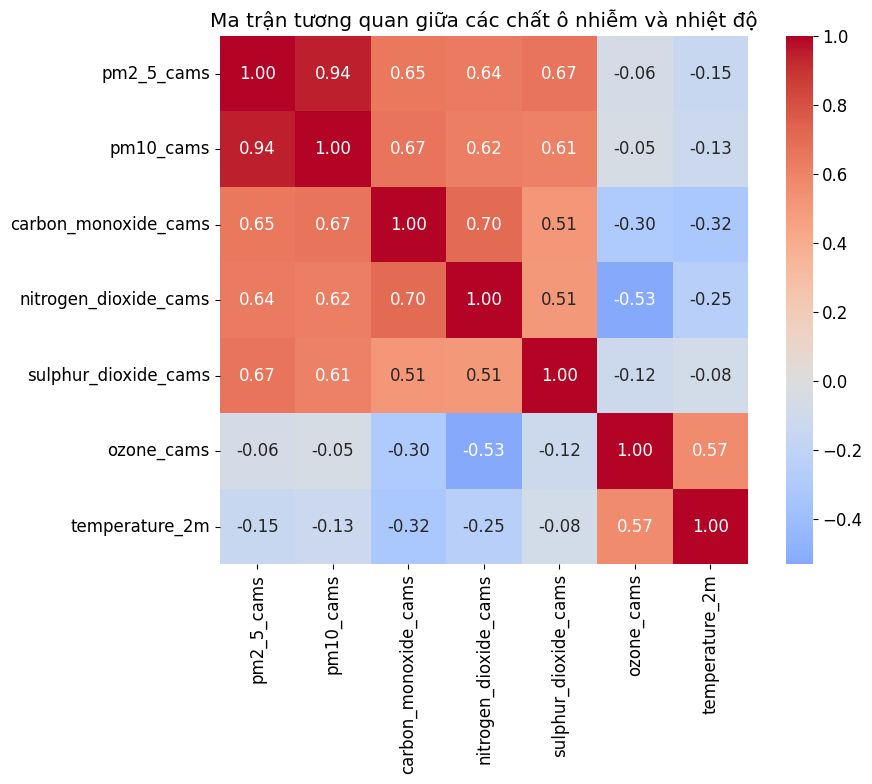


Các cặp có tương quan mạnh (|r| > 0.5):
                   Chất 1                 Chất 2  Tương quan
0              pm2_5_cams              pm10_cams    0.944296
7    carbon_monoxide_cams  nitrogen_dioxide_cams    0.701884
4               pm10_cams   carbon_monoxide_cams    0.670710
3              pm2_5_cams   sulphur_dioxide_cams    0.665963
1              pm2_5_cams   carbon_monoxide_cams    0.651824
2              pm2_5_cams  nitrogen_dioxide_cams    0.636091
5               pm10_cams  nitrogen_dioxide_cams    0.619371
6               pm10_cams   sulphur_dioxide_cams    0.605310
11             ozone_cams         temperature_2m    0.567714
10  nitrogen_dioxide_cams             ozone_cams   -0.532075
8    carbon_monoxide_cams   sulphur_dioxide_cams    0.509788
9   nitrogen_dioxide_cams   sulphur_dioxide_cams    0.506487


In [ ]:
## 8. Phân tích tương quan giữa các chất ô nhiễm
print("\n" + "=" * 60)
print("PHÂN TÍCH TƯƠNG QUAN GIỮA CÁC CHẤT Ô NHIỄM")
print("=" * 60)

pollutants_corr = data[['pm2_5_cams', 'pm10_cams', 'carbon_monoxide_cams',
                       'nitrogen_dioxide_cams', 'sulphur_dioxide_cams',
                       'ozone_cams', 'temperature_2m']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(pollutants_corr, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Ma trận tương quan giữa các chất ô nhiễm và nhiệt độ')
plt.tight_layout()
plt.show()

# Tương quan mạnh nhất
strong_correlations = []
for i in range(len(pollutants_corr.columns)):
    for j in range(i+1, len(pollutants_corr.columns)):
        corr_value = pollutants_corr.iloc[i, j]
        if abs(corr_value) > 0.5:  # Ngưỡng tương quan mạnh
            strong_correlations.append({
                'Chất 1': pollutants_corr.columns[i],
                'Chất 2': pollutants_corr.columns[j],
                'Tương quan': corr_value
            })

strong_corr_df = pd.DataFrame(strong_correlations)
if not strong_corr_df.empty:
    print("\nCác cặp có tương quan mạnh (|r| > 0.5):")
    print(strong_corr_df.sort_values('Tương quan', key=abs, ascending=False))
else:
    print("\nKhông có cặp nào có tương quan mạnh (|r| > 0.5)")


**I. Mối Quan Hệ Giữa Các Chất Ô Nhiễm Sơ Cấp (Tương Quan Dương Mạnh)**

Đây là những chất ô nhiễm được phát thải trực tiếp từ cùng một nguồn (như đốt nhiên liệu hóa thạch, giao thông, công nghiệp).

Bụi & Bụi ($\text{PM}_{2.5}$ & $\text{PM}_{10}$): $r = 0.94$ (Cực kỳ mạnh)

Mối tương quan gần như tuyệt đối này khẳng định nguồn phát thải của bụi mịn và bụi thô là gần như chung một nguồn, và các biện pháp kiểm soát bụi thô sẽ có tác động rất lớn đến bụi mịn.

$\text{PM}_{2.5}$ / $\text{PM}_{10}$ với $\text{CO}$ / $\text{NO}_2$: $r = 0.62$ đến $0.67$ (Mạnh)

Các chất này thường là sản phẩm của quá trình đốt cháy không hoàn toàn (từ giao thông và công nghiệp). $\text{CO}$ và $\text{NO}_2$ là các chỉ báo tốt cho thấy cường độ giao thông/công nghiệp đang tạo ra lượng bụi $\text{PM}$ đáng kể.

$\text{CO}$ & $\text{NO}_2$: $r = 0.70$ (Mạnh)

Cả hai đều là sản phẩm chính của khí thải phương tiện giao thông. Mối tương quan mạnh nhất ngoài bụi cho thấy giao thông là nguồn đóng góp lớn và cần được kiểm soát đồng bộ.

$\text{SO}_2$: Chất này có tương quan mạnh với $\text{PM}_{2.5}$ ($r=0.67$) và $\text{PM}_{10}$ ($r=0.61$), cũng như $\text{CO}$ và $\text{NO}_2$ ($r \sim 0.51$).

Mặc dù $\text{SO}_2$ thường liên quan đến nhiệt điện than và công nghiệp nặng, nhưng việc tương quan với các chất khí thải giao thông cho thấy nguồn phát thải $\text{SO}_2$ có sự pha trộn giữa công nghiệp và đốt nhiên liệu có lưu huỳnh (như dầu diesel) trong giao thông hoặc các lò đốt nhỏ.

**II. Mối Quan Hệ Với $\text{O}_3$ và Nhiệt Độ**

Mối quan hệ này thể hiện bản chất thứ cấp của $\text{O}_3$ và vai trò của khí tượng.

$\text{O}_3$ & Nhiệt độ: $r = 0.57$ (Dương Mạnh)

Đây là bằng chứng quan trọng nhất về cơ chế hình thành quang hóa của $\text{O}_3$. Nhiệt độ cao làm tăng tốc độ phản ứng tạo $\text{O}_3$, xác nhận rằng $\text{O}_3$ là vấn đề phụ thuộc vào khí hậu/khí tượng.

$\text{O}_3$ & $\text{NO}_2$: $r = -0.53$ (Âm Mạnh)

Mối tương quan âm mạnh là một hiện tượng hóa học quan trọng. $\text{NO}_2$ là tiền chất của $\text{O}_3$, nhưng $\text{O}_3$ lại bị tiêu thụ bởi $\text{NO}$ (là sản phẩm từ $\text{NO}_2$) vào ban đêm hoặc gần nguồn phát thải mạnh, tạo ra chu trình $\text{NO} + \text{O}_3 \rightarrow \text{NO}_2 + \text{O}_2$. Mối tương quan âm mạnh cho thấy sự tiêu thụ $\text{O}_3$ bởi các chất khí thải mới đang xảy ra thường xuyên.

Hầu hết các chất ô nhiễm sơ cấp di chuyển cùng nhau. $\text{O}_3$ hoàn toàn tách biệt, được điều khiển bởi nhiệt độ và bị suy giảm bởi các chất phát thải sơ cấp ngay tại nguồn.


SO SÁNH TẤT CẢ CHẤT Ô NHIỄM


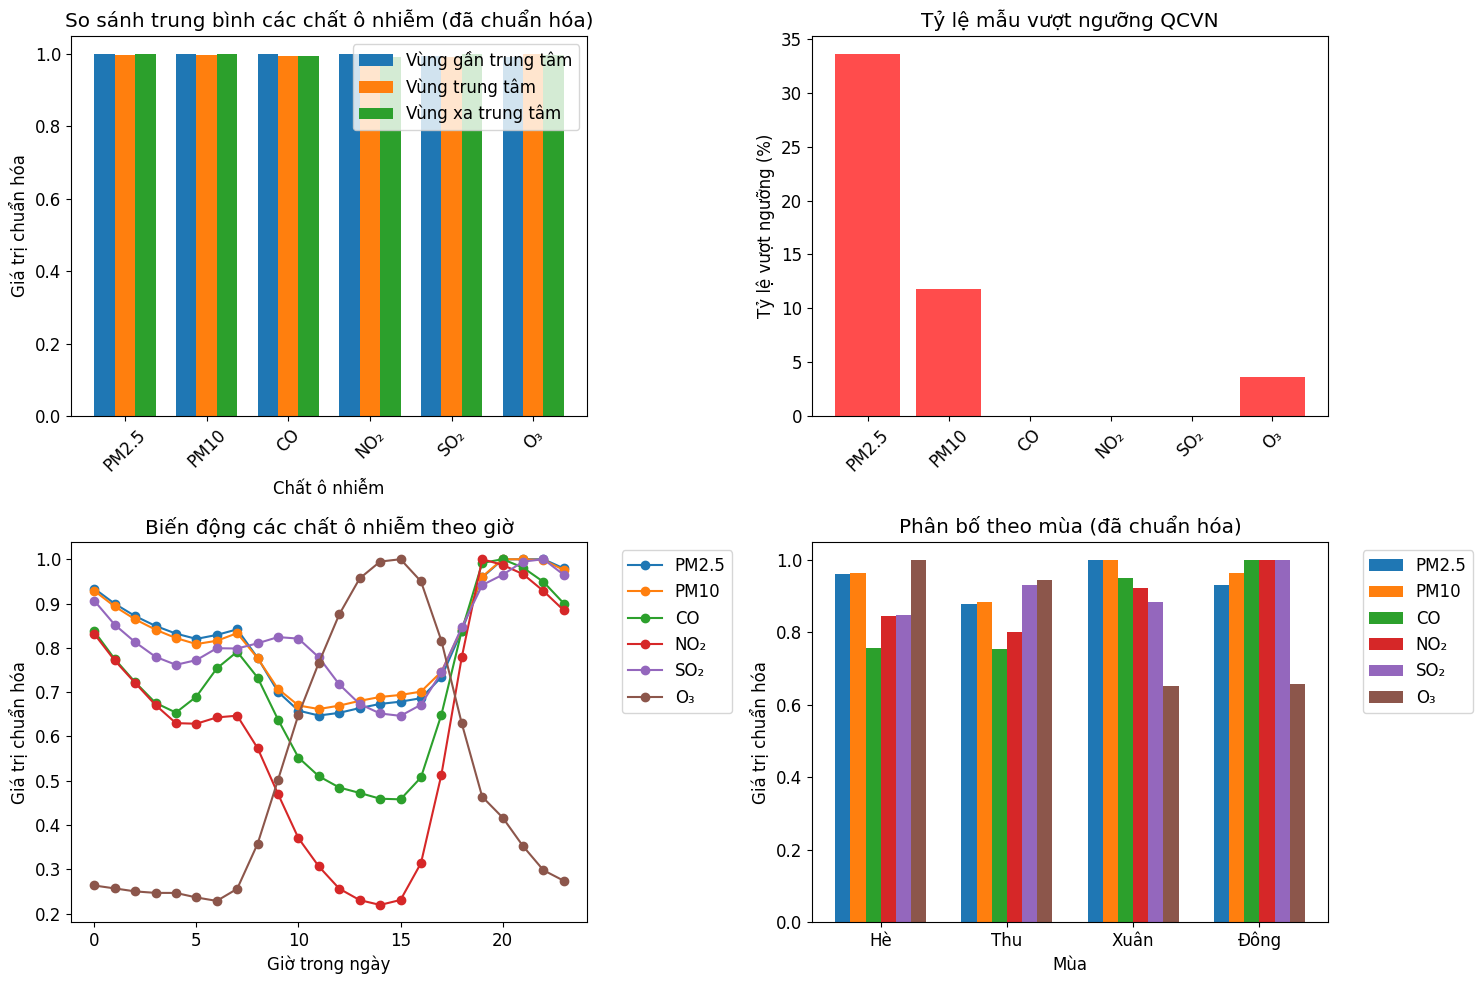

In [ ]:
## 5. BIỂU ĐỒ SO SÁNH TẤT CẢ CHẤT Ô NHIỄM
print("\n" + "=" * 60)
print("SO SÁNH TẤT CẢ CHẤT Ô NHIỄM")
print("=" * 60)

# Biểu đồ so sánh trung bình theo vùng
pollutants = ['pm2_5_cams', 'pm10_cams', 'carbon_monoxide_cams',
              'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams']
pollutant_names = ['PM2.5', 'PM10', 'CO', 'NO₂', 'SO₂', 'O₃']

plt.figure(figsize=(15, 10))

# Biểu đồ 1: Trung bình các chất theo vùng
plt.subplot(2, 2, 1)
mean_pollutants = data.groupby('area')[pollutants].mean()
# Chuẩn hóa để so sánh (do đơn vị khác nhau)
normalized_means = mean_pollutants / mean_pollutants.max()
x = range(len(pollutants))
width = 0.25

for i, area in enumerate(mean_pollutants.index):
    plt.bar([p + i*width for p in x], normalized_means.loc[area], width, label=area)

plt.xlabel('Chất ô nhiễm')
plt.ylabel('Giá trị chuẩn hóa')
plt.title('So sánh trung bình các chất ô nhiễm (đã chuẩn hóa)')
plt.xticks([p + width for p in x], pollutant_names, rotation=45)
plt.legend()

# Biểu đồ 2: Tỷ lệ vượt ngưỡng theo chất
plt.subplot(2, 2, 2)
thresholds = [50, 100, 30000, 200, 350, 200]  # Ngưỡng 1h/24h tùy chất
violation_rates = []

for i, poll in enumerate(pollutants):
    violation_rate = (data[poll] > thresholds[i]).sum() / len(data) * 100
    violation_rates.append(violation_rate)

plt.bar(pollutant_names, violation_rates, color='red', alpha=0.7)
plt.ylabel('Tỷ lệ vượt ngưỡng (%)')
plt.title('Tỷ lệ mẫu vượt ngưỡng QCVN')
plt.xticks(rotation=45)

# Biểu đồ 3: Biến động theo giờ (tất cả chất)
plt.subplot(2, 2, 3)
hourly_all = data.groupby('hour')[pollutants].mean()
# Chuẩn hóa theo giờ
hourly_normalized = hourly_all / hourly_all.max()
for i, poll in enumerate(pollutants):
    plt.plot(hourly_normalized.index, hourly_normalized[poll], marker='o', label=pollutant_names[i])

plt.xlabel('Giờ trong ngày')
plt.ylabel('Giá trị chuẩn hóa')
plt.title('Biến động các chất ô nhiễm theo giờ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Biểu đồ 4: Phân bố theo mùa
plt.subplot(2, 2, 4)
seasonal_avg = data.groupby('season')[pollutants].mean()
seasonal_normalized = seasonal_avg / seasonal_avg.max()

x_season = range(len(seasonal_avg.index))
width = 0.12

for i, poll in enumerate(pollutants):
    plt.bar([p + i*width for p in x_season], seasonal_normalized[poll], width, label=pollutant_names[i])

plt.xlabel('Mùa')
plt.ylabel('Giá trị chuẩn hóa')
plt.title('Phân bố theo mùa (đã chuẩn hóa)')
plt.xticks([p + 2.5*width for p in x_season], seasonal_avg.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

CHUẨn hóa LÀM gì các chất ô nhiễm có thang đo khác nhau k chuẩn hóa thì co chiếm toàn biểu đồ làm các chất khác k tahasy

I. So Sánh Trung Bình giữa các Vùng


Tính Đồng Nhất Cao: Tất cả các chất ($\text{PM}_{2.5}, \text{PM}_{10}, \text{CO}, \text{NO}_2, \text{SO}_2, \text{O}_3$) đều cho thấy các cột gần như đồng nhất giữa Vùng Trung tâm, Vùng Gần trung tâm và Vùng Xa trung tâm.

củng cố nhận định rằng ô nhiễm không khí là vấn đề mang tính khu vực rộng lớn, không bị cô lập ở một loại khu vực địa lý cụ thể nào. Biện pháp kiểm soát cần áp dụng trên phạm vi toàn thành phố, không chỉ tập trung vào khu vực trung tâm.

II. Tỷ lệ Mẫu Vượt Ngưỡng QCVN


$\text{PM}_{2.5}$ là Vấn đề Nghiêm trọng nhất: Hơn $33\%$ mẫu $\text{PM}_{2.5}$ vượt ngưỡng QCVN, là chất có tỷ lệ vượt ngưỡng cao nhất, gấp gần 3 lần $\text{PM}_{10}$.

$\text{PM}_{10}$: Khoảng $11\%$ mẫu vượt ngưỡng.$\text{O}_3$: Có khoảng $4-5\%$ mẫu vượt ngưỡng (ngưỡng cao).

Bụi mịn ($\text{PM}_{2.5}$) là ưu tiên hàng đầu cần kiểm soát vì tần suất vượt ngưỡng QCVN của nó là vượt trội. Các chất khí $\text{CO}, \text{NO}_2, \text{SO}_2$ dù có tương quan mạnh nhưng nồng độ của chúng vẫn nằm trong tầm kiểm soát tốt.

III. Biến Động của các Chất Ô Nhiễm theo Giờ

Nhóm Chất Ô Nhiễm Sơ Cấp (Đỉnh Đêm/Sáng sớm)

:$\text{PM}_{2.5}, \text{PM}_{10}, \text{CO}, \text{NO}_2$ đều có xu hướng tăng mạnh từ chiều tối và đạt đỉnh cao nhất vào đêm muộn/sáng sớm (khoảng 21h - 0h).

Mô hình này bị chi phối bởi hiện tượng nghịch nhiệt bề mặt vào ban đêm (không khí ấm "đậy nắp" không khí lạnh bên dưới, giữ chất ô nhiễm gần mặt đất) và hoạt động giao thông/công nghiệp vào giờ cao điểm. $\text{NO}_2$ có sự tăng nhẹ vào giờ cao điểm sáng và chiều.

$\text{O}_3$ (Đỉnh Chiều):$\text{O}_3$ có động thái hoàn toàn trái ngược, đạt đỉnh cực đại vào giữa chiều (14h-16h) và thấp nhất vào đêm (giá trị chuẩn hóa xuống $\sim 0.2$).

Điều này xác nhận cơ chế hình thành quang hóa (cần ánh sáng mặt trời mạnh) và sự tiêu thụ $\text{O}_3$ bởi các chất $\text{NO}$ (từ $\text{NO}_2$) vào ban đêm.

IV. Phân Bố Mùa (Đã Chuẩn Hóa)

Mùa Đông là Vấn đề Lớn nhất: Hầu hết các chất ô nhiễm sơ cấp ($\text{PM}_{2.5}, \text{PM}_{10}, \text{CO}, \text{NO}_2, \text{SO}_2$) đều có nồng độ cao nhất vào Mùa Đông.

Mùa Đông thường có điều kiện khí tượng (lớp nghịch nhiệt mạnh và ổn định hơn, ít mưa, ít gió) kém thuận lợi nhất cho sự phân tán chất ô nhiễm, dẫn đến sự tích tụ lớn nhất.

Mùa Hè là Vấn đề của $\text{O}_3$: $\text{O}_3$ đạt cao nhất vào Mùa Hè (do nhiệt độ và ánh sáng cao nhất).

Mùa Xuân/Thu: Nồng độ các chất sơ cấp có xu hướng giảm.

V. Kết Luận Tổng Thể

$\text{PM}_{2.5}$ là mối quan tâm lớn nhất về mức độ tuân thủ tiêu chuẩn. Trong khi các chất khí được kiểm soát tốt về mặt giá trị tuyệt đối. Động thái ô nhiễm được điều khiển bởi hai cơ chế chính: nghịch nhiệt bề mặt vào đêm/Đông (làm tăng $\text{PM}, \text{CO}, \text{NO}_2, \text{SO}_2$) và quang hóa vào ngày/Hè (làm tăng $\text{O}_3$).

Tất cả các chất ô nhiễm đều có nồng độ trung bình rất đồng nhất giữa Vùng Trung tâm, Gần trung tâm và Xa trung tâm

Ô nhiễm không khí là vấn đề mang tính khu vực rộng, không bị cô lập, đòi hỏi giải pháp toàn thành phố.

Nhóm Sơ cấp ($\text{PM}, \text{CO}, \text{NO}_2, \text{SO}_2$): Đạt đỉnh đêm muộn/sáng sớm và cao nhất vào Mùa Đông.

Lý do: Bị kẹt lại do hiện tượng nghịch nhiệt bề mặt (mùa Đông và ban đêm là thời điểm nghịch nhiệt mạnh nhất, ngăn phân tán).

$\text{O}_3$ (Thứ cấp): Đạt đỉnh giữa chiều và cao nhất vào Mùa Hè.

Lý do: Hình thành qua quá trình quang hóa, phụ thuộc trực tiếp vào cường độ ánh sáng và nhiệt độ cao.

#Nồng độ từng chất theo vị trí

/tmp/ipython-input-723756786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location_id', y=col, data=mean_pollutants_by_loc,
/tmp/ipython-input-723756786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location_id', y=col, data=mean_pollutants_by_loc,
/tmp/ipython-input-723756786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location_id', y=col, data=mean_pollutants_by_loc,
/tmp/ipython-input-723756786.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

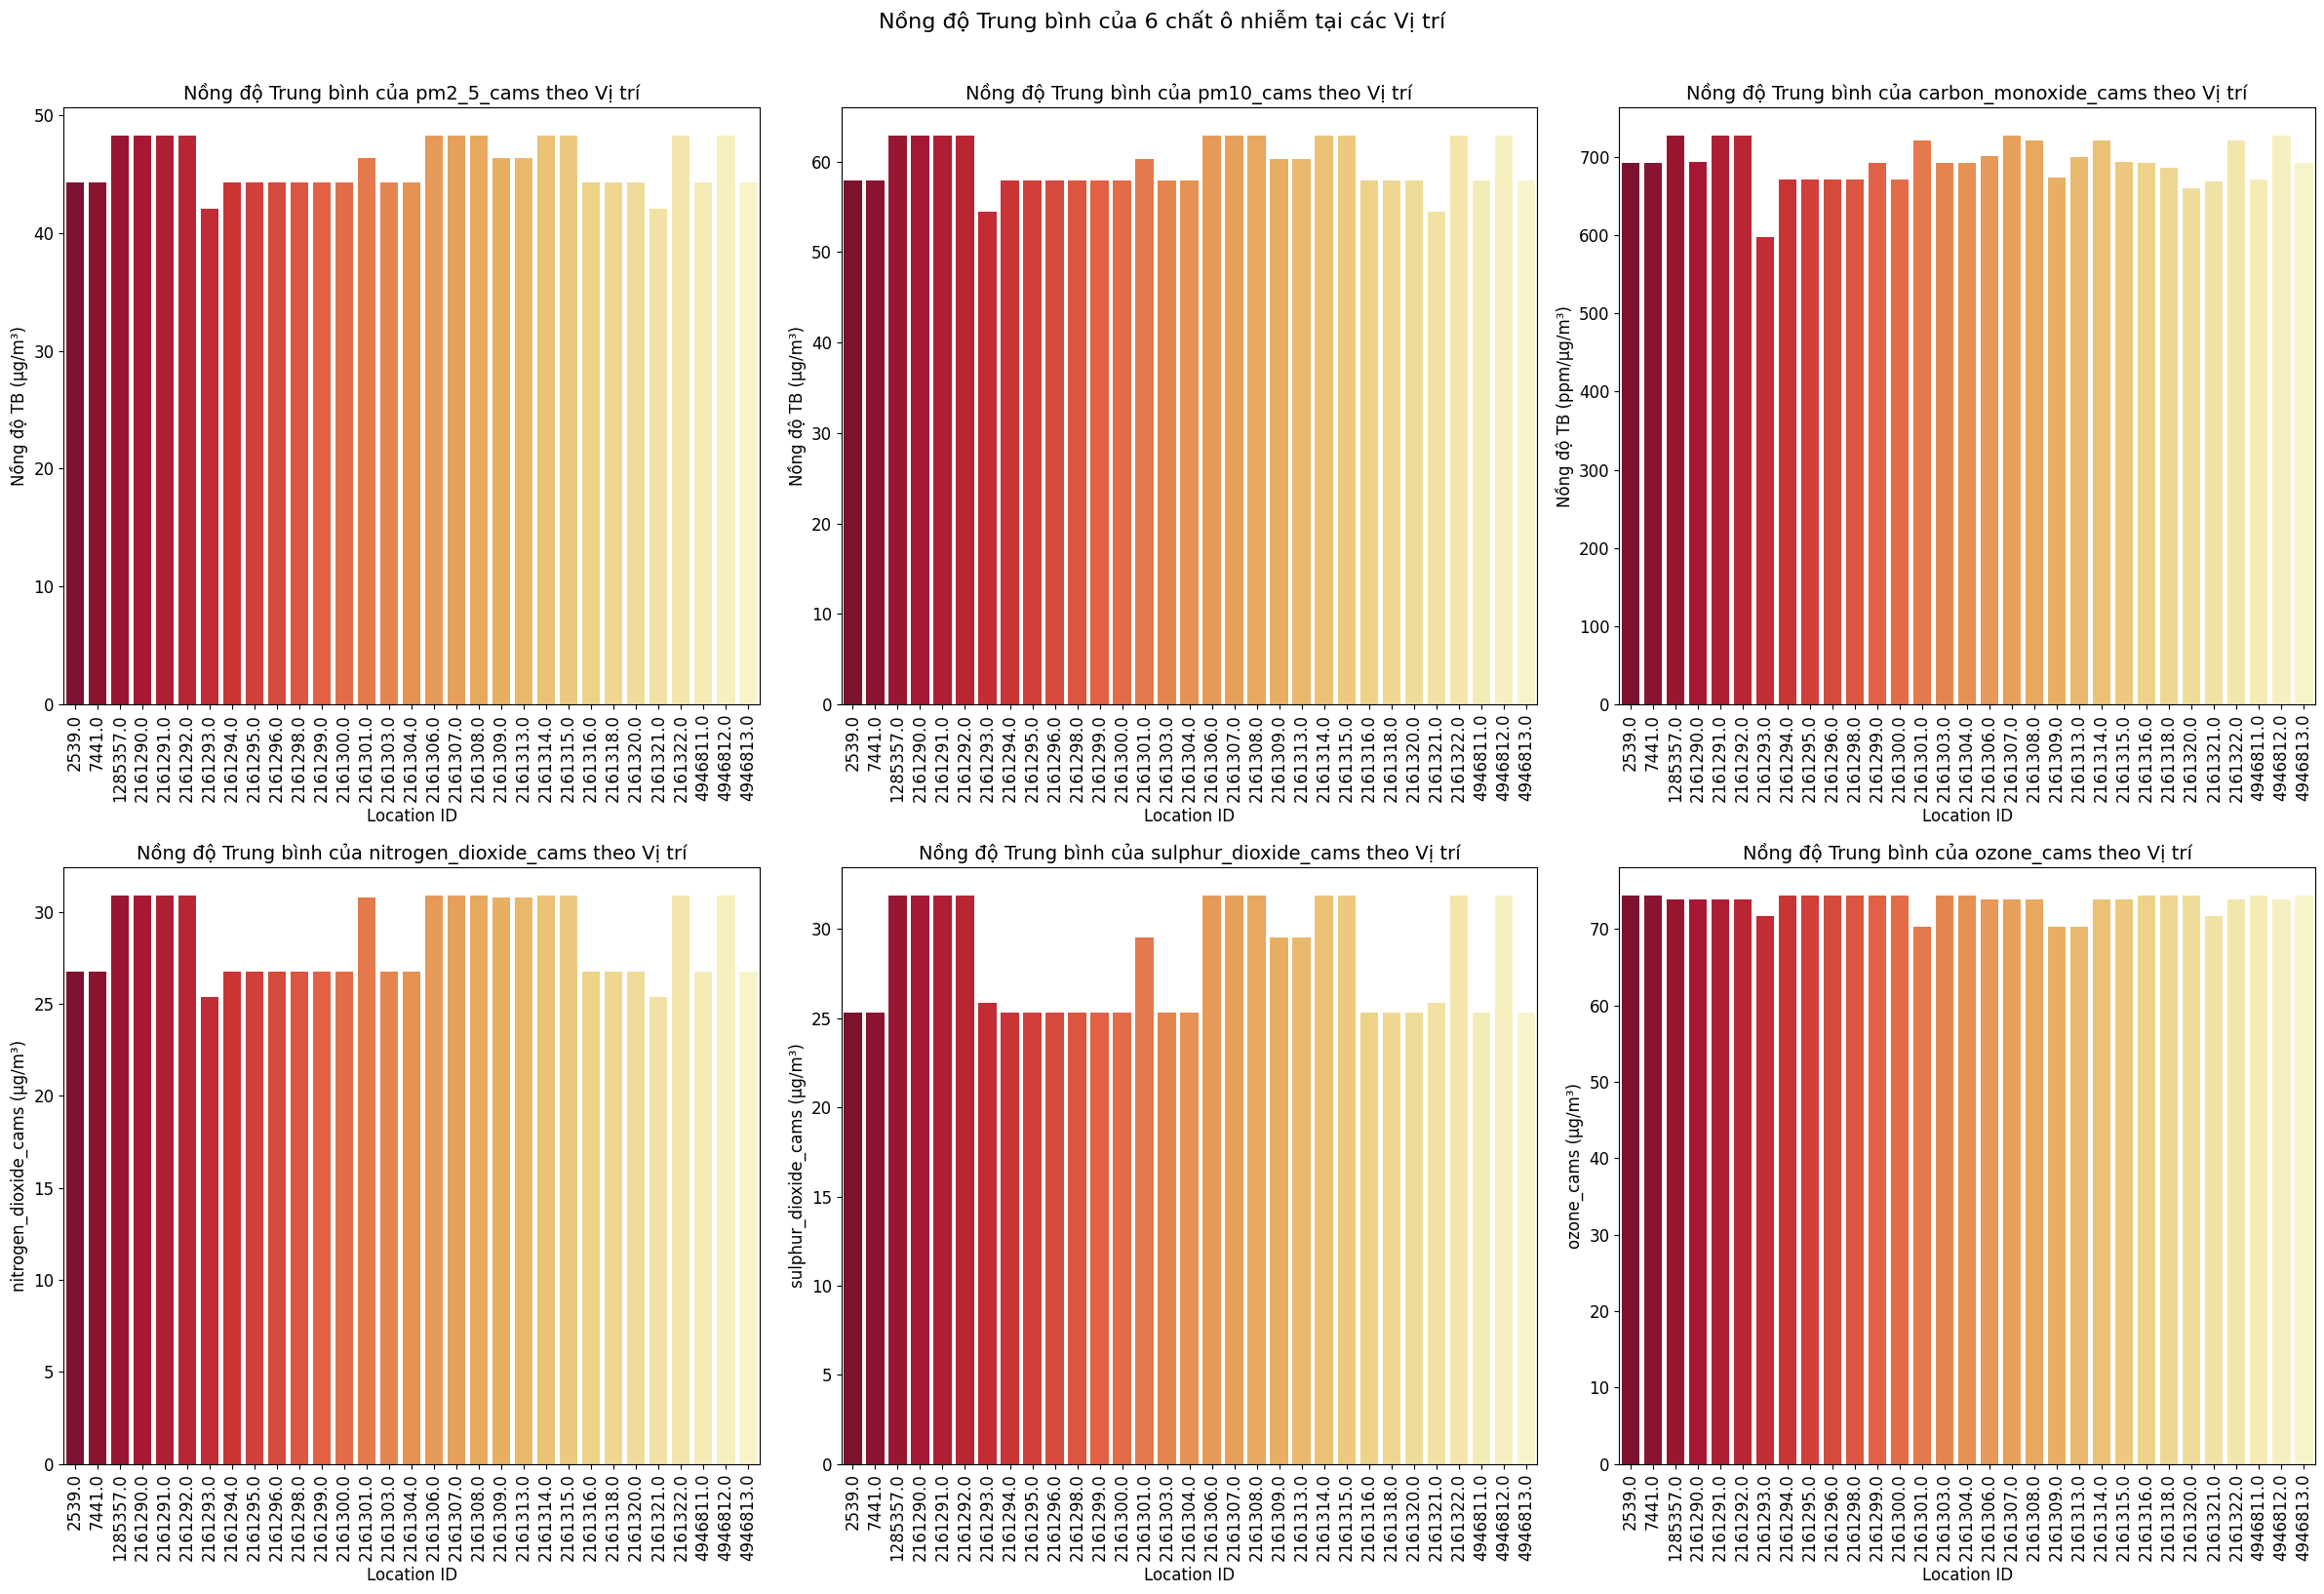

In [ ]:
##Biểu đồ Nồng độ Trung bình  từng chất theo vị trí
pollutants = ['pm2_5_cams', 'pm10_cams', 'carbon_monoxide_cams',
              'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams']

# Tính giá trị trung bình của các chất ô nhiễm theo location_id (giữ nguyên logic)
mean_pollutants_by_loc = data.groupby('location_id')[pollutants].mean().reset_index()

# Tăng kích thước tổng thể
plt.figure(figsize=(24, 16))

for i, col in enumerate(pollutants):
    plt.subplot(2, 3, i + 1) # 2 hàng, 3 cột

    # Vẽ Bar Plot so sánh giá trị TB của một chất tại tất cả Location ID
    sns.barplot(x='location_id', y=col, data=mean_pollutants_by_loc,
            palette='YlOrRd_r',
            legend=False)      # <--- Tắt legend thừa


    plt.title(f'Nồng độ Trung bình của {col} theo Vị trí', fontsize=14)
    plt.xlabel('Location ID', fontsize=12)
    plt.xticks(rotation=90) # Xoay nhãn X

    # Đơn vị
    if 'pm' in col:
        plt.ylabel(f'Nồng độ TB (µg/m³)', fontsize=12)
    elif 'carbon_monoxide' in col:
        plt.ylabel(f'Nồng độ TB (ppm/µg/m³)', fontsize=12)
    else:
        plt.ylabel(f'{col} (µg/m³)', fontsize=12)

plt.suptitle('Nồng độ Trung bình của 6 chất ô nhiễm tại các Vị trí', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

Tại sao nhiều trạm có giá trị bằng hoặc gần bằng nhau

Sử dụng Mô hình Toán học (Model): Hậu tố _cams trong tên các chỉ số (như pm2_5_cams) cho thấy đây là dữ liệu từ Hệ thống Giám sát Khí quyển Toàn cầu (CAMS) của Châu Âu. Đây là một mô hình dự báo và ước tính dựa trên vệ tinh, mô hình khí tượng và các nguồn dữ liệu mặt đất. Các mô hình này thường có độ phân giải không gian nhất định (ví dụ: ô lưới 10x10 km). Các trạm nằm trong cùng một ô lưới của mô hình sẽ được gán cùng một giá trị ước tính. Đây là lý do chính dẫn đến việc nhiều trạm có số liệu giống hệt nhau.

Ảnh hưởng của Nguồn ô nhiễm Vùng: Các chất ô nhiễm như PM2.5, PM10, Ozone có khả năng phát tán rất xa. Một khu vực rộng lớn (như toàn thành phố Hà Nội) có thể chịu ảnh hưởng từ cùng một đám mây ô nhiễm do gió đưa từ một nguồn chính (giao thông, công nghiệp vùng ven, đốt rơm rạ...), dẫn đến nồng độ đồng đều trên diện rộng.

Nhóm trạm có cùng đặc điểm đô thị: Các trạm có chỉ số giống nhau thường nằm trong các khu vực có mật độ giao thông, xây dựng và hoạt động kinh tế-xã hội tương đồng (ví dụ: cùng là khu vực nội đô, trung tâm).

1. Bụi Mịn (PM2.5 & PM10)
Phân bố: Ô nhiễm nhất tại các trạm trung tâm như SPARTAN, Cầu Diễn, Phạm Văn Đồng. Sạch hơn ở các trạm ven đô như Chúc Sơn, Văn Quán.

*Ô nhiễm bụi nghiêm trọng trên toàn thành phố. Nguồn chính được xác định là từ giao thông, dựa trên mối tương quan cao giữa các điểm nóng về bụi và các trục đường giao thông chính.*

2. Khí CO & NO2
Phân bố: Các điểm nóng (ví dụ: Lưu Quang Vũ, Mỹ Đình) trùng khớp với các khu vực giao thông đông đúc.

*Có thể nói giao thông là nguồn ô nhiễm chính, vì CO và NO2 là sản phẩm đặc trưng của quá trình đốt cháy nhiên liệu.*

3. Khí Ozone (O3)
Phân bố: Đồng đều tại khu vực trung tâm (Hàng Đậu, Đào Duy Từ...) và các vùng ven.
Ozone là chất ô nhiễm thứ cấp, hình thành từ khí thải giao thông (NOx, VOCs) dưới ánh sáng mặt trời. Dựa và sự phân bố đồng đều cho thấy Ozone là một vấn đề phức tạp và toàn diện của thành phố
4. Khí Sulphur Dioxide (SO2)
Phân bố:
Cao nhất (32): Các trạm trung tâm có giao thông đông đúc như Cầu Diễn, Phạm Văn Đồng, Lưu Quang Vũ.
Thấp nhất (25): Các trạm ở vị trí khác như Thành Công, Vân Hà, ĐH Bách Khoa.
Sự chênh lệch này cho thấy khí thải từ giao thông (xăng/dầu) là nguồn phát thải SO2 chính, chứ không phải từ các nguồn công nghiệp cố định (thường gây ra ô nhiễm SO2 quy mô lớn hơn và lan rộng hơn). Xu hướng này trùng khớp với các chất ô nhiễm khác, củng cố kết luận về tác động của giao thông tới chất lượng không khí.

In [ ]:
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd

# 1. Tính toán và chuẩn bị dữ liệu
mean_pm25 = data.groupby('location_id')['pm2_5_cams'].mean().reset_index()

# Lấy tọa độ trạm (dùng .first() để lấy tọa độ đầu tiên cho mỗi trạm)
stations = data.groupby('location_id')[['lat', 'lon']].first().reset_index()

# Gộp dữ liệu PM2.5 trung bình với tọa độ
stations = pd.merge(mean_pm25, stations, on='location_id', how='left')

# 2. Xử lý màu sắc gradient (TỪ VÀNG ĐẾN ĐỎ)
# Chọn Colormap: 'YlOrRd' (Yellow-Orange-Red). PM2.5 cao nhất = Đỏ đậm nhất.
cmap = plt.cm.get_cmap('YlOrRd')

# Chuẩn hóa (Normalize) dữ liệu PM2.5 trung bình về thang [0, 1]
min_val = stations['pm2_5_cams'].min()
max_val = stations['pm2_5_cams'].max()

# Xử lý trường hợp min_val == max_val để tránh lỗi chia cho 0 trong Normalize
if min_val == max_val:
    # If all values are the same, use the middle color of the cmap
    stations['color_hex'] = colors.to_hex(cmap(0.5))
else:
    norm = colors.Normalize(vmin=min_val, vmax=max_val)
    # Apply normalization and convert to Hex color codes
    stations['color_hex'] = stations['pm2_5_cams'].apply(
        lambda x: colors.to_hex(cmap(norm(x)))
    )

# 3. Tạo Bản đồ Folium
# Tạo bản đồ trung tâm Hà Nội (21.03, 105.85)
m = folium.Map(location=[21.03, 105.85], zoom_start=11)

# 4. Thêm điểm trạm với màu gradient
for _, row in stations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=6,
        color=row['color_hex'],  # SỬ DỤNG MÀU GRADIENT ĐÃ TÍNH TOÁN
        fill=True,
        fill_opacity=0.8,
        popup=f"Trạm {row['location_id']}<br>PM2.5 TB: {row['pm2_5_cams']:.1f} µg/m³"
    ).add_to(m)

# Lưu và hiển thị bản đồ
m.save("pm25_map_gradient_custom.html")
m

/tmp/ipython-input-24385013.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


# tương quan

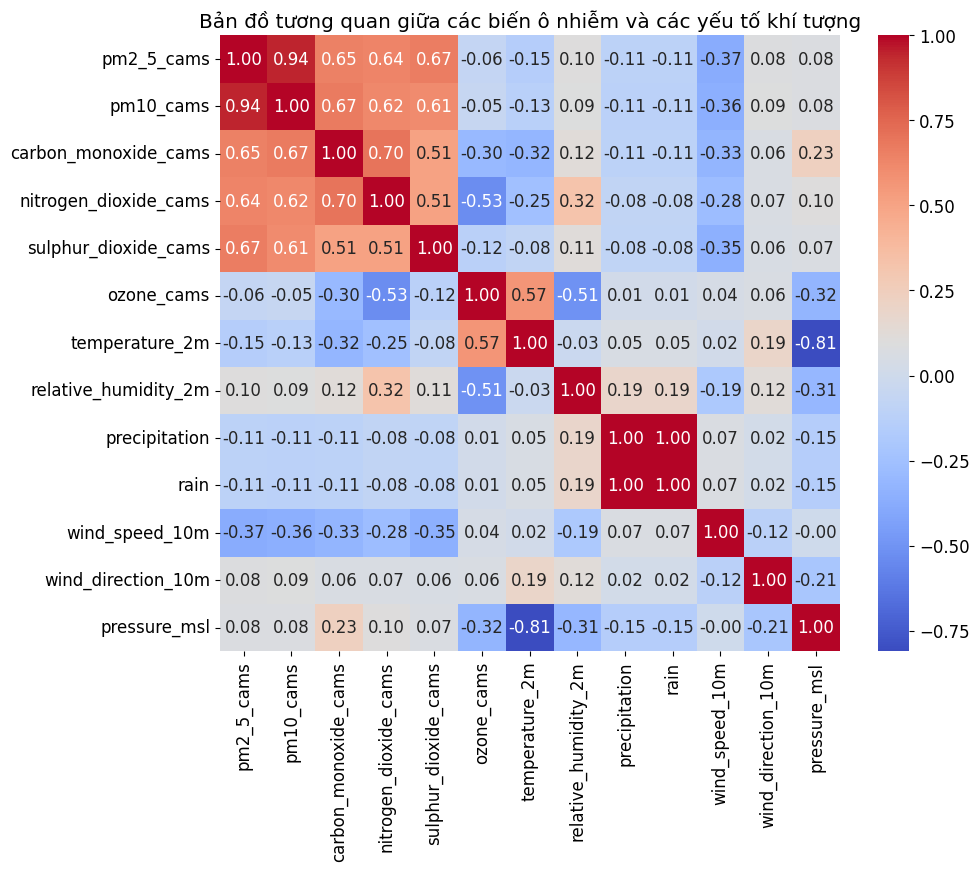

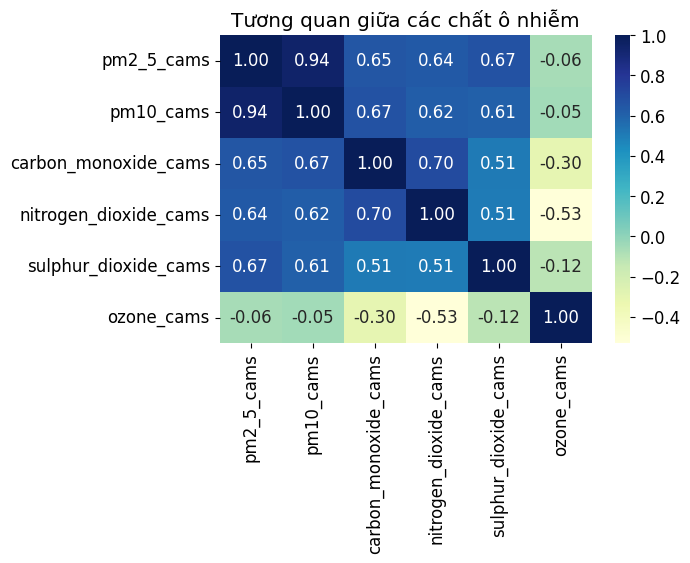

In [ ]:
# Kiểm tra tương quan giữa các chất ô nhiễm và yếu tố khí tượng

pollutants = ['pm2_5_cams', 'pm10_cams', 'carbon_monoxide_cams',
              'nitrogen_dioxide_cams', 'sulphur_dioxide_cams', 'ozone_cams']

weather_vars = ['temperature_2m', 'relative_humidity_2m', 'precipitation',
                'rain', 'wind_speed_10m', 'wind_direction_10m',
                'pressure_msl']

corr_matrix = data[pollutants + weather_vars].corr()

# Trực quan hóa tương quan (Heatmap)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Bản đồ tương quan giữa các biến ô nhiễm và các yếu tố khí tượng")
plt.show()


# So sánh tương quan giữa các chất ô nhiễm

plt.figure(figsize=(6,4))
sns.heatmap(data[pollutants].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Tương quan giữa các chất ô nhiễm")
plt.show()


Bụi mịn (PM2.5, PM10) thường tăng/giảm cùng nhau và liên quan đến các chất khí ô nhiễm khác như CO, NO2, SO2.​

Ozone chịu ảnh hưởng mạnh từ các yếu tố khí tượng và có chiều hướng trái ngược với nhóm khí NO2, SO2.​

Gió, mưa và áp suất khí quyển đều giúp làm giảm bớt nồng độ các chất ô nhiễm.

### Kết quả chính của Phân tích Dữ liệu

* Nồng độ bụi PM2.5 và PM10 tại Hà Nội ở mức cao, với nồng độ trung bình hàng năm và một số ngày vượt quá tiêu chuẩn quốc gia đáng kể. Khu vực trung tâm và ngoại thành có nồng độ bụi dạng hạt cao nhất.
* Nồng độ bụi PM2.5, PM10, CO và NO2 đạt đỉnh vào giờ cao điểm, cho thấy mối liên hệ với giao thông. Nồng độ ozone cao nhất vào ban ngày, đặc biệt là vào buổi chiều, tương quan với ánh sáng mặt trời và nhiệt độ.
* Gió mạnh và mưa giúp giảm ô nhiễm bụi dạng hạt, trong khi gió lặng và mưa ít dẫn đến nồng độ bụi cao hơn. Nhiệt độ có mối tương quan dương mạnh với ozone.
* Mối tương quan dương mạnh tồn tại giữa PM2.5, PM10, CO, NO2 và SO2, cho thấy các nguồn phát thải chung như giao thông. Ozone có mối tương quan âm mạnh với NO2.
* Khu vực trung tâm và gần trung tâm ghi nhận nồng độ CO và NO2 cao hơn, có thể là do giao thông và hoạt động đô thị. Ozone phân bố đều hơn.